In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/cse519/project/

/content/drive/MyDrive/cse519/project


In [ ]:
!pip install -q kaggle

In [ ]:
# In your Colab notebook, run the following code to upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amoghagashe","key":"9c55ca781263c5d7d3fa16d15633e107"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c nfl-big-data-bowl-2025

100% 1.14G/1.14G [00:08<00:00, 225MB/s]
100% 1.14G/1.14G [00:08<00:00, 148MB/s]


In [ ]:
!unzip nfl-big-data-bowl-2025.zip

Archive:  nfl-big-data-bowl-2025.zip
  inflating: games.csv               
  inflating: player_play.csv         
  inflating: players.csv             
  inflating: plays.csv               
  inflating: tracking_week_1.csv     
  inflating: tracking_week_2.csv     
  inflating: tracking_week_3.csv     
  inflating: tracking_week_4.csv     
  inflating: tracking_week_5.csv     
  inflating: tracking_week_6.csv     
  inflating: tracking_week_7.csv     
  inflating: tracking_week_8.csv     
  inflating: tracking_week_9.csv     


In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install geopandas contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
player_play = pd.read_csv("player_play.csv")
games = pd.read_csv("games.csv")
plays = pd.read_csv("plays.csv")
players = pd.read_csv("players.csv")

In [ ]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


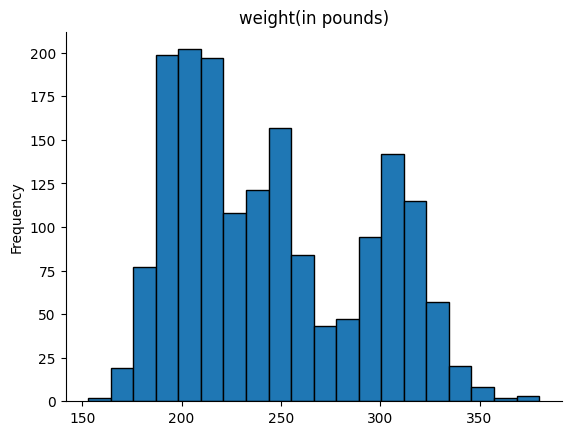

In [ ]:
from matplotlib import pyplot as plt
players['weight'].plot(kind='hist', bins=20, title='weight(in pounds)', edgecolor="black")
plt.gca().spines[['top', 'right',]].set_visible(False)

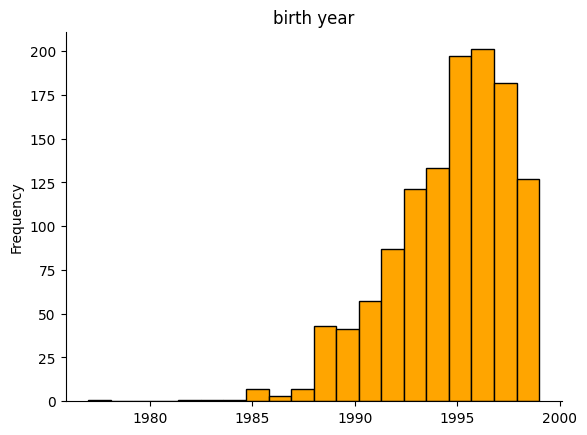

In [ ]:
players['birthYear'] = pd.DatetimeIndex(players['birthDate']).year
players['birthYear'].plot(kind='hist', bins=20, color="orange", title='birth year', edgecolor="black")
plt.gca().spines[['top', 'right',]].set_visible(False)

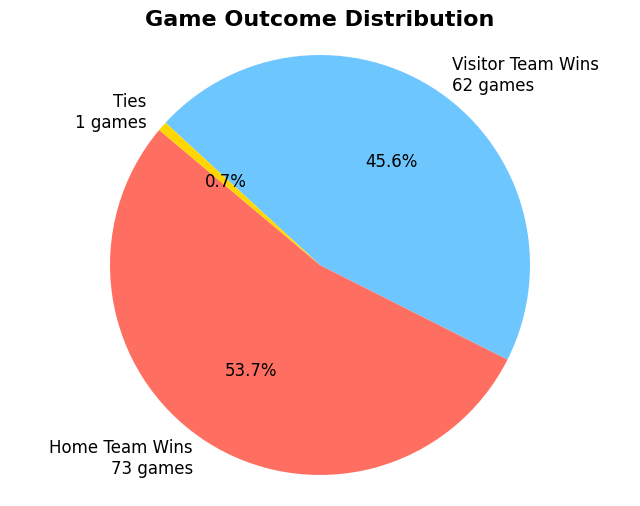

In [ ]:
# Calculate the outcome of each game
games['home_win'] = games['homeFinalScore'] > games['visitorFinalScore']
games['visitor_win'] = games['visitorFinalScore'] > games['homeFinalScore']
games['tie'] = games['homeFinalScore'] == games['visitorFinalScore']

# Count the number of wins for each team and ties
home_wins = games['home_win'].sum()
visitor_wins = games['visitor_win'].sum()
ties = games['tie'].sum()

# Create a pie chart with simpler, cleaner visuals
labels = [
    f'Home Team Wins\n{home_wins} games',
    f'Visitor Team Wins\n{visitor_wins} games',
    f'Ties\n{ties} games'
]
sizes = [home_wins, visitor_wins, ties]
colors = ['#FF6F61', '#6EC6FF', '#FFD700']

plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'color': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Game Outcome Distribution', fontsize=16, fontweight='bold')
plt.show()


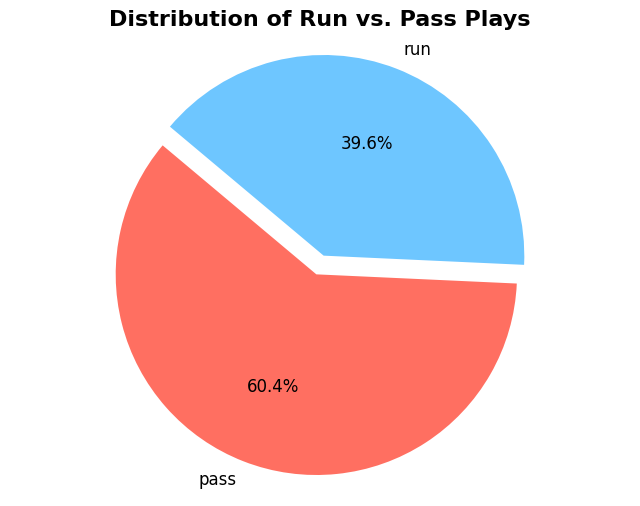

In [ ]:
# Step 1: Classify plays as 'run' or 'pass' based on the playDescription
# plays['playType'] = plays['playDescription'].apply(lambda x: 'pass' if 'pass' in x.lower() else 'run')


plays['playType'] = plays.apply(lambda row: 'pass' if row['isDropback'] else 'run', axis=1)

# Step 2: Count the number of run and pass plays
play_counts = plays['playType'].value_counts()

# Step 3: Create a pie chart to show the distribution of run vs. pass plays
labels = play_counts.index
sizes = play_counts.values
colors = ['#FF6F61', '#6EC6FF']  # Soft contrasting colors for the pie chart
explode = (0.1, 0)  # Explode the 'pass' slice for emphasis

plt.figure(figsize=(8, 6))  # Set figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'color': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Run vs. Pass Plays', fontsize=16, fontweight='bold')
plt.show()

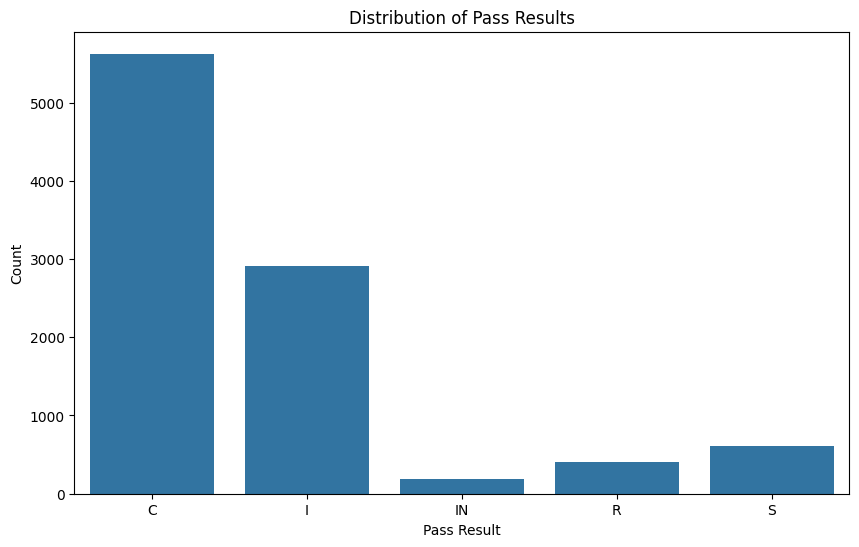

In [ ]:
# Count of each pass result
plt.figure(figsize=(10,6))
sns.countplot(data=plays, x='passResult')
plt.title('Distribution of Pass Results')
plt.xlabel('Pass Result')
plt.ylabel('Count')
plt.show()

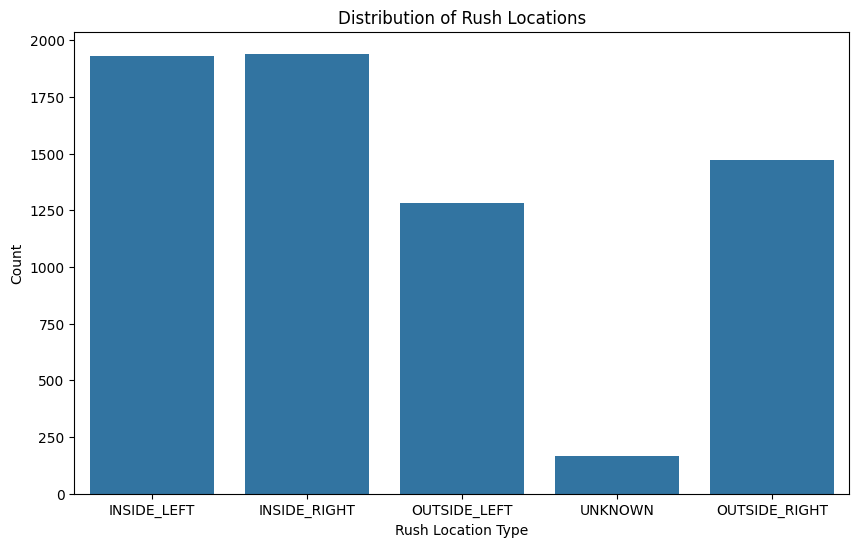

In [ ]:
# Count of rush locations (Inside left, Inside right, etc.)
plt.figure(figsize=(10,6))
sns.countplot(data=plays, x='rushLocationType')
plt.title('Distribution of Rush Locations')
plt.xlabel('Rush Location Type')
plt.ylabel('Count')
plt.show()

## Visualize the effect of team formations on play types.


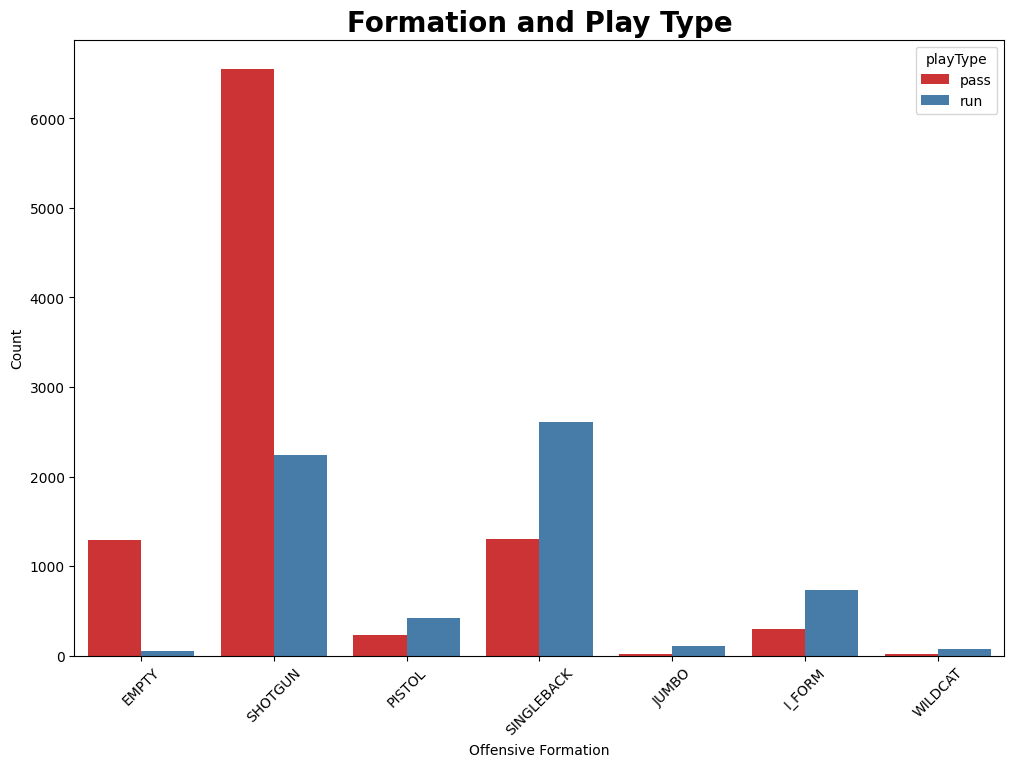

In [ ]:
# Count plot showing the correlation between formations and play type (run vs pass)
plt.figure(figsize=(12, 8))
sns.countplot(data=plays, x='offenseFormation', hue='playType', palette='Set1')
plt.title('Formation and Play Type', fontsize=20, fontweight='bold')
plt.xlabel('Offensive Formation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import plotly.express as px
# Assuming your data is in 'plays' DataFrame
# Grouping by offenseFormation and calculating mean yards gained and expected points
offensive_formations = plays.groupby('offenseFormation')[['yardsGained', 'expectedPoints', 'preSnapHomeScore', 'preSnapVisitorScore']].mean()

# Sort by the formation that has the highest average yards gained
offensive_formations = offensive_formations.sort_values(by='yardsGained', ascending=False)

# Display the top formations by yards gained
offensive_formations


,yardsGained,expectedPoints,preSnapHomeScore,preSnapVisitorScore
offenseFormation,,,,
EMPTY,5.778689,1.822690,10.909091,9.606557
SHOTGUN,5.734729,2.118450,11.591855,10.491412
SINGLEBACK,5.353768,2.494728,10.585441,9.249808
PISTOL,5.043682,2.594781,10.826833,9.271451
I_FORM,4.997101,2.522038,10.122705,8.860870
WILDCAT,4.643678,3.284269,11.379310,8.045977
JUMBO,2.328000,3.909315,11.112000,10.536000


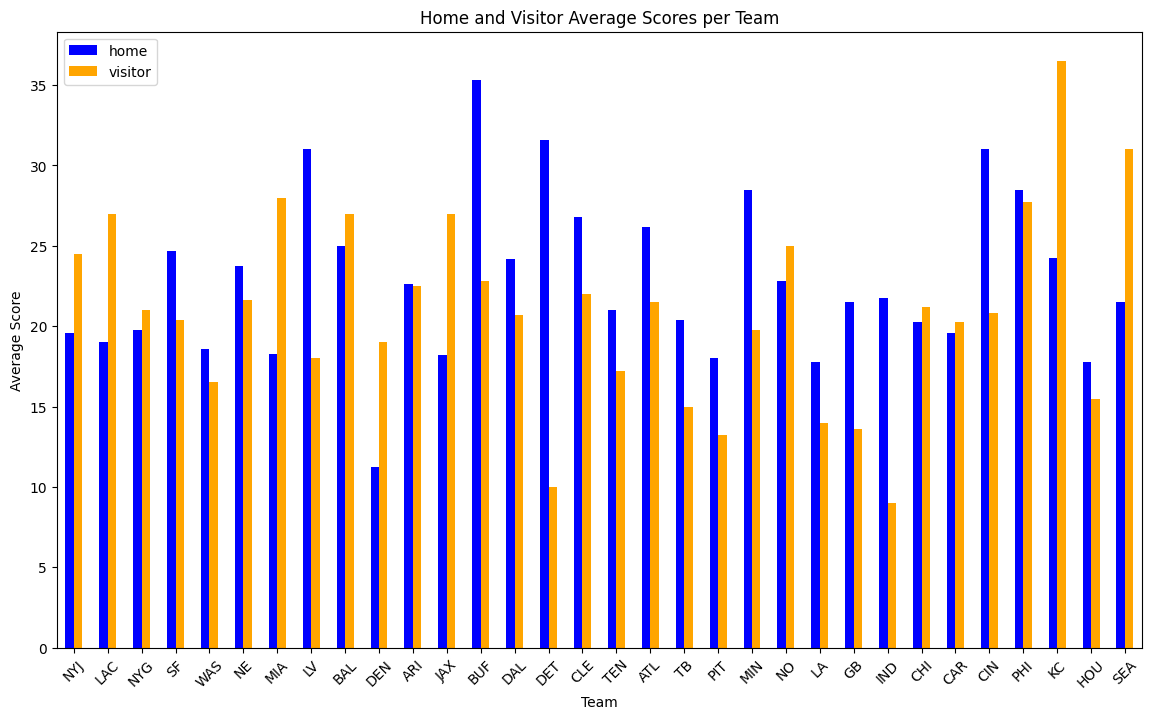

In [ ]:
# a. Bar chart comparing home and visitor scores for each team
teams = set(games['homeTeamAbbr']).union(set(games['visitorTeamAbbr']))
team_scores = {}

for team in teams:
    home_games = games[games['homeTeamAbbr'] == team]
    visitor_games = games[games['visitorTeamAbbr'] == team]

    home_avg_score = home_games['homeFinalScore'].mean() if not home_games.empty else 0
    visitor_avg_score = visitor_games['visitorFinalScore'].mean() if not visitor_games.empty else 0

    team_scores[team] = {'home': home_avg_score, 'visitor': visitor_avg_score}

# Convert to DataFrame for easier plotting
team_scores_df = pd.DataFrame(team_scores).T

# Plotting Bar Chart for Home and Visitor Scores
team_scores_df.plot(kind='bar', figsize=(14,8), color=['blue', 'orange'])
plt.title('Home and Visitor Average Scores per Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

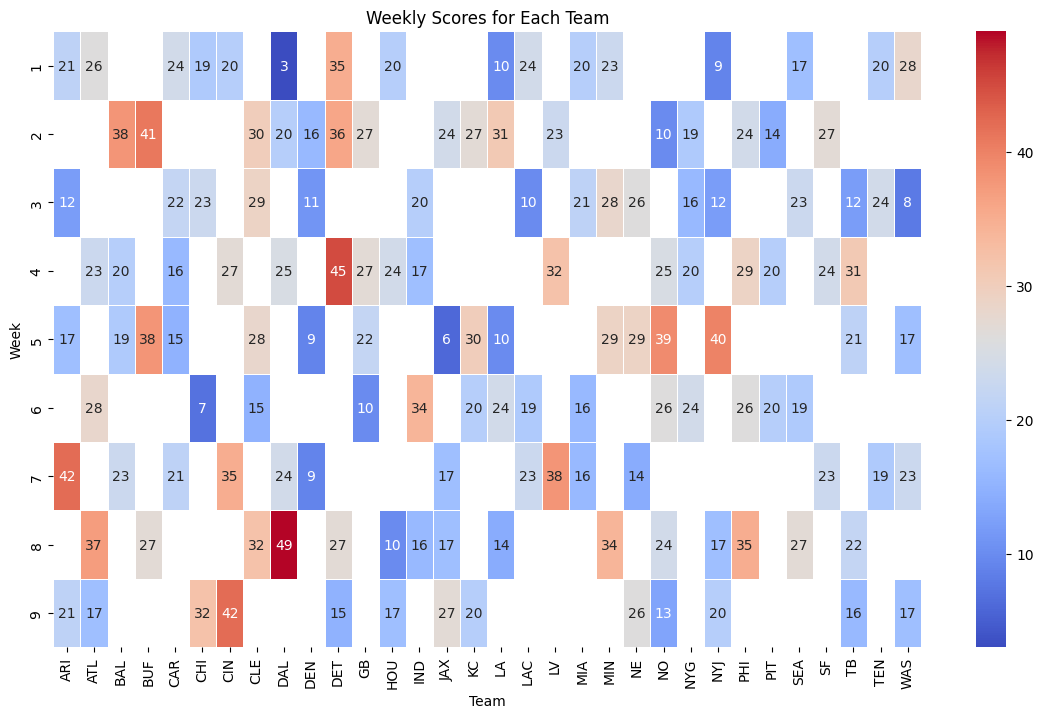

In [ ]:
# Pivoting data for the heatmap
heatmap_data = games.pivot_table(index='week', columns='homeTeamAbbr', values='homeFinalScore', aggfunc='sum')

# Plotting Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f', linewidths=0.5)
plt.title('Weekly Scores for Each Team')
plt.xlabel('Team')
plt.ylabel('Week')
plt.show()


## BAsed on Player play data

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Dummy data for pre and post-snap positions of 22 players
data = {
    "player": [f"Player{i}" for i in range(1, 23)],
    "team": ["Offense"] * 11 + ["Defense"] * 11,
    "pre_snap_x": [5, 10, 10, 15, 20, 25, 25, 30, 30, 35, 35, 60, 65, 65, 70, 75, 80, 80, 85, 85, 90, 90],
    "pre_snap_y": [10, 20, 40, 30, 10, 20, 40, 30, 10, 20, 40, 10, 20, 40, 30, 10, 20, 40, 30, 10, 20, 40],
    "post_snap_x": [7, 12, 12, 18, 23, 27, 27, 33, 33, 37, 37, 62, 67, 67, 73, 78, 83, 83, 88, 88, 93, 93],
    "post_snap_y": [12, 22, 42, 32, 12, 22, 42, 32, 12, 22, 42, 12, 22, 42, 32, 12, 22, 42, 32, 12, 22, 42]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotly interactive scatter plot for pre-snap and post-snap
fig = go.Figure()

# Adding pre-snap positions
fig.add_trace(go.Scatter(
    x=df[df["team"] == "Offense"]["pre_snap_x"],
    y=df[df["team"] == "Offense"]["pre_snap_y"],
    mode="markers+text",
    marker=dict(color="blue", size=12),
    name="Offense Pre-Snap",
    text=df[df["team"] == "Offense"]["player"],
    textposition="top center"
))

fig.add_trace(go.Scatter(
    x=df[df["team"] == "Defense"]["pre_snap_x"],
    y=df[df["team"] == "Defense"]["pre_snap_y"],
    mode="markers+text",
    marker=dict(color="red", size=12),
    name="Defense Pre-Snap",
    text=df[df["team"] == "Defense"]["player"],
    textposition="top center"
))

# Adding post-snap positions
fig.add_trace(go.Scatter(
    x=df[df["team"] == "Offense"]["post_snap_x"],
    y=df[df["team"] == "Offense"]["post_snap_y"],
    mode="markers+text",
    marker=dict(color="lightblue", size=12),
    name="Offense Post-Snap",
    text=df[df["team"] == "Offense"]["player"],
    textposition="top center",
    visible=False
))

fig.add_trace(go.Scatter(
    x=df[df["team"] == "Defense"]["post_snap_x"],
    y=df[df["team"] == "Defense"]["post_snap_y"],
    mode="markers+text",
    marker=dict(color="orange", size=12),
    name="Defense Post-Snap",
    text=df[df["team"] == "Defense"]["player"],
    textposition="top center",
    visible=False
))

# Adding slider to toggle between pre-snap and post-snap
fig.update_layout(
    sliders=[{
        "active": 0,
        "currentvalue": {"prefix": "Snap Position: "},
        "steps": [
            {
                "label": "Pre-Snap",
                "method": "update",
                "args": [{"visible": [True, True, False, False]}]
            },
            {
                "label": "Post-Snap",
                "method": "update",
                "args": [{"visible": [False, False, True, True]}]
            }
        ]
    }]
)

# Setting field layout
fig.update_layout(
    title="Interactive Pre-Snap and Post-Snap Positions",
    xaxis=dict(range=[0, 100], title="Field Length"),
    yaxis=dict(range=[0, 50], title="Field Width"),
    height=600,
    width=800,
    showlegend=True
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Define pre-snap and post-snap positions for offense and defense players
# Example formation: Offense - Shotgun Formation, Defense - 3-4 Defense

# Pre-snap positions
pre_snap_positions = [
    {"player_id": "O1", "x": 10, "y": 26.5, "team": "offense"},   # QB
    {"player_id": "O2", "x": 7, "y": 26.5, "team": "offense"},    # RB
    {"player_id": "O3", "x": 5, "y": 15, "team": "offense"},      # WR1
    {"player_id": "O4", "x": 5, "y": 38, "team": "offense"},      # WR2
    {"player_id": "O5", "x": 8, "y": 30, "team": "offense"},      # TE
    {"player_id": "O6", "x": 6, "y": 24, "team": "offense"},      # LT
    {"player_id": "O7", "x": 6, "y": 27, "team": "offense"},      # LG
    {"player_id": "O8", "x": 6, "y": 29.5, "team": "offense"},    # C
    {"player_id": "O9", "x": 6, "y": 32, "team": "offense"},      # RG
    {"player_id": "O10", "x": 6, "y": 35, "team": "offense"},     # RT

    {"player_id": "D1", "x": 15, "y": 24, "team": "defense"},     # DL1
    {"player_id": "D2", "x": 15, "y": 29.5, "team": "defense"},   # DL2
    {"player_id": "D3", "x": 15, "y": 35, "team": "defense"},     # DL3
    {"player_id": "D4", "x": 20, "y": 24, "team": "defense"},     # LB1
    {"player_id": "D5", "x": 20, "y": 29.5, "team": "defense"},   # LB2
    {"player_id": "D6", "x": 20, "y": 35, "team": "defense"},     # LB3
    {"player_id": "D7", "x": 30, "y": 15, "team": "defense"},     # CB1
    {"player_id": "D8", "x": 30, "y": 38, "team": "defense"},     # CB2
    {"player_id": "D9", "x": 30, "y": 24, "team": "defense"},     # S1
    {"player_id": "D10", "x": 30, "y": 35, "team": "defense"}     # S2
]

# Post-snap positions
post_snap_positions = [
    {"player_id": "O1", "x": 13, "y": 26.5, "team": "offense"},
    {"player_id": "O2", "x": 11, "y": 26.5, "team": "offense"},
    {"player_id": "O3", "x": 15, "y": 13, "team": "offense"},
    {"player_id": "O4", "x": 15, "y": 40, "team": "offense"},
    {"player_id": "O5", "x": 12, "y": 30, "team": "offense"},
    {"player_id": "O6", "x": 9, "y": 24, "team": "offense"},
    {"player_id": "O7", "x": 9, "y": 27, "team": "offense"},
    {"player_id": "O8", "x": 9, "y": 29.5, "team": "offense"},
    {"player_id": "O9", "x": 9, "y": 32, "team": "offense"},
    {"player_id": "O10", "x": 9, "y": 35, "team": "offense"},

    {"player_id": "D1", "x": 18, "y": 24, "team": "defense"},
    {"player_id": "D2", "x": 18, "y": 29.5, "team": "defense"},
    {"player_id": "D3", "x": 18, "y": 35, "team": "defense"},
    {"player_id": "D4", "x": 23, "y": 24, "team": "defense"},
    {"player_id": "D5", "x": 23, "y": 29.5, "team": "defense"},
    {"player_id": "D6", "x": 23, "y": 35, "team": "defense"},
    {"player_id": "D7", "x": 32, "y": 13, "team": "defense"},
    {"player_id": "D8", "x": 32, "y": 40, "team": "defense"},
    {"player_id": "D9", "x": 32, "y": 24, "team": "defense"},
    {"player_id": "D10", "x": 32, "y": 35, "team": "defense"}
]

# Adjusted positions centered on a 53.3 x 120 field
pre_snap_positions_centered = [
    {"player_id": pos["player_id"], "x": pos["x"] + 50, "y": pos["y"], "team": pos["team"]}
    for pos in pre_snap_positions
]
post_snap_positions_centered = [
    {"player_id": pos["player_id"], "x": pos["x"] + 50, "y": pos["y"], "team": pos["team"]}
    for pos in post_snap_positions
]

# Updating the code to use a lighter shade of green for the background,
# and setting up a more descriptive legend with clear markers and colors for offense and defense
# Initialize the figure with field layout
fig = go.Figure()

# Draw field boundaries
fig.add_shape(type="rect", x0=0, y0=0, x1=120, y1=53.3, line=dict(color="darkgreen", width=3))

# Draw yard lines
for yard in range(10, 111, 10):
    fig.add_shape(type="line", x0=yard, y0=0, x1=yard, y1=53.3, line=dict(color="white", width=1))

# Track whether legends have been added for each category
legend_shown = {"offense_pre": False, "offense_post": False, "defense_pre": False, "defense_post": False}

# Plot pre-snap and post-snap positions with connecting lines
for pre, post in zip(pre_snap_positions_centered, post_snap_positions_centered):
    team_color = "red" if pre["team"] == "offense" else "blue"

    # Pre-snap position marker
    fig.add_trace(go.Scatter(
        x=[pre["x"]], y=[pre["y"]],
        mode="markers",
        marker=dict(size=10, color=team_color, symbol="circle"),
        name=f"{pre['team'].capitalize()} Pre-Snap",
        legendgroup=f"{pre['team']}_pre",
        showlegend=not legend_shown[f"{pre['team']}_pre"]
    ))
    legend_shown[f"{pre['team']}_pre"] = True  # Mark legend as shown

    # Post-snap position marker
    fig.add_trace(go.Scatter(
        x=[post["x"]], y=[post["y"]],
        mode="markers",
        marker=dict(size=10, color=team_color, symbol="square"),
        name=f"{pre['team'].capitalize()} Post-Snap",
        legendgroup=f"{pre['team']}_post",
        showlegend=not legend_shown[f"{pre['team']}_post"]
    ))
    legend_shown[f"{pre['team']}_post"] = True  # Mark legend as shown

    # Connecting line
    fig.add_trace(go.Scatter(
        x=[pre["x"], post["x"]],
        y=[pre["y"], post["y"]],
        mode="lines",
        line=dict(color=team_color, width=2),
        showlegend=False
    ))

# Customize layout
fig.update_layout(
    title="NFL Field - Pre and Post Snap Positions",
    xaxis=dict(range=[0, 120], title="Yard Line"),
    yaxis=dict(range=[0, 53.3], title="Field Width", showgrid=False, zeroline=False),
    plot_bgcolor="lightgreen",
    paper_bgcolor="lightgreen",
    font=dict(color="black"),
    height=700,
    legend=dict(title="Player Positions", orientation="h", yanchor="top", y=1.02, xanchor="center", x=0.5)
)

fig.show()


In [ ]:
tracking_data = pd.read_csv("tracking_week_1.csv")
tracking_data.describe()

,gameId,playId,nflId,frameId,jerseyNumber,x,y,s,a,dis,o,dir
count,7.104700e+06,7.104700e+06,6.795800e+06,7.104700e+06,6.795800e+06,7.104700e+06,7.104700e+06,7.104700e+06,7.104700e+06,7.104700e+06,6.796189e+06,6.796189e+06
mean,2.022091e+09,2.024279e+03,4.718625e+04,8.693164e+01,4.808540e+01,6.087936e+01,2.682726e+01,1.359180e+00,9.440965e-01,1.389657e-01,1.791678e+02,1.798761e+02
std,7.693544e+01,1.227634e+03,5.050182e+03,5.901554e+01,3.081648e+01,2.456882e+01,7.696377e+00,1.889584e+00,1.194888e+00,1.945765e-01,9.753189e+01,1.044881e+02
min,2.022091e+09,5.500000e+01,2.551100e+04,1.000000e+00,1.000000e+00,-5.060000e+00,-8.940000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.022091e+09,9.550000e+02,4.338400e+04,4.000000e+01,2.100000e+01,4.110000e+01,2.244000e+01,6.000000e-02,6.000000e-02,1.000000e-02,8.933000e+01,8.966000e+01
50%,2.022091e+09,1.995000e+03,4.621400e+04,8.100000e+01,5.100000e+01,6.114000e+01,2.682000e+01,5.600000e-01,5.300000e-01,6.000000e-02,1.773200e+02,1.796500e+02
75%,2.022091e+09,3.043000e+03,5.249800e+04,1.260000e+02,7.500000e+01,8.026000e+01,3.119000e+01,1.960000e+00,1.350000e+00,2.000000e-01,2.692200e+02,2.703500e+02
max,2.022091e+09,5.120000e+03,5.517300e+04,6.970000e+02,9.900000e+01,1.256000e+02,6.947000e+01,2.914000e+01,5.658000e+01,7.630000e+00,3.600000e+02,3.600000e+02


# Task 2: Formation Clustering

Formation Counts:
offenseFormation
SHOTGUN       8791
SINGLEBACK    3915
EMPTY         1342
I_FORM        1035
PISTOL         641
JUMBO          125
WILDCAT         87
Name: count, dtype: int64

Receiver Alignment Counts:
receiverAlignment
2x2    6483
3x1    6044
2x1    1824
3x2    1232
1x1     160
4x1     129
2x0      45
3x0       9
1x0       8
4x2       1
3x3       1
Name: count, dtype: int64


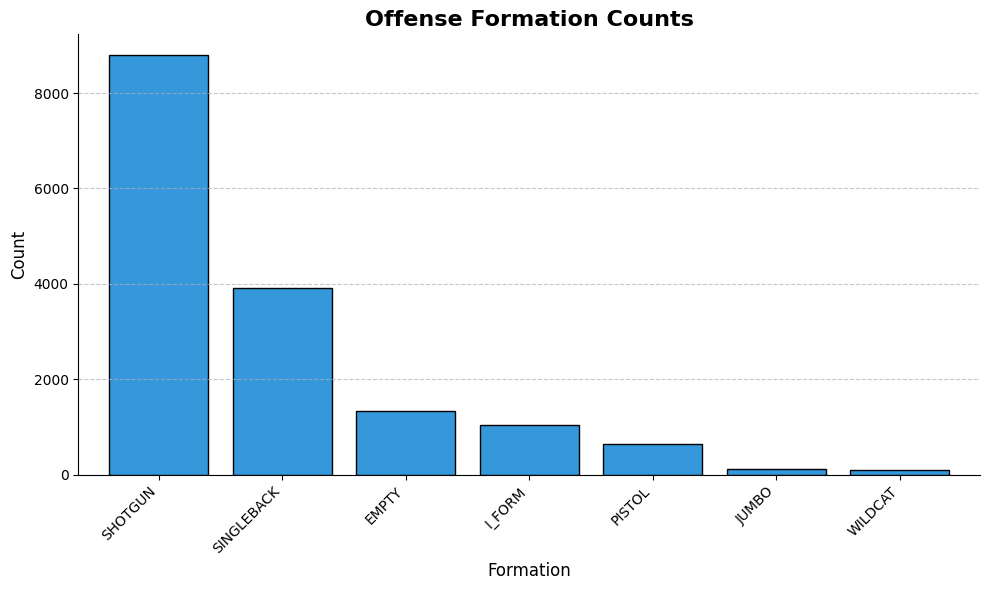

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
data = pd.read_csv("plays.csv")

# Step 1: Remove rows with missing data in essential columns
essential_columns = ['offenseFormation', 'receiverAlignment', 'yardsToGo', 'down', 'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore']
data = data.dropna(subset=essential_columns)

# Step 2: Convert 'gameClock' from MM:SS format to total seconds
def convert_time_to_seconds(time_str):
    try:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds
    except:
        return None  # If the time format is incorrect, return None to handle it

# Apply conversion to 'gameClock' column
data['gameClock_seconds'] = data['gameClock'].apply(convert_time_to_seconds)

# Step 3: Count the occurrences of each offense formation
formation_counts = data['offenseFormation'].value_counts()
print("Formation Counts:")
print(formation_counts)

# Step 4: Analyze the receiver alignment distributions
receiver_alignment_counts = data['receiverAlignment'].value_counts()
print("\nReceiver Alignment Counts:")
print(receiver_alignment_counts)

# Assuming formation_counts is your data
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart with a color palette
formation_counts.plot(kind='bar', ax=ax, color='#3498db', edgecolor='black', width=0.8)

# Title and labels with improved font size
ax.set_title('Offense Formation Counts', fontsize=16, fontweight='bold')
ax.set_xlabel('Formation', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a grid for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders for cleaner appearance
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

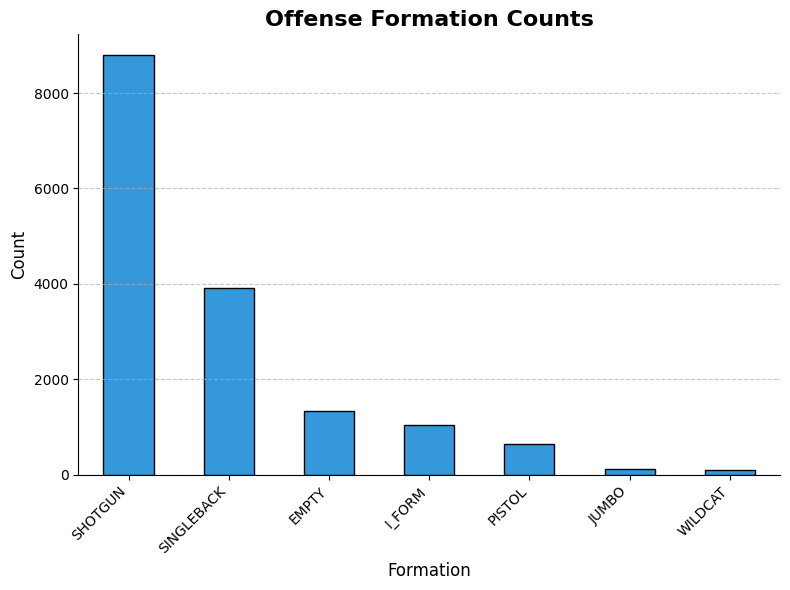

In [ ]:
# Assuming formation_counts is your data
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart with a color palette
formation_counts.plot(kind='bar', ax=ax, color='#3498db', edgecolor='black', width=0.5)

# Title and labels with improved font size
ax.set_title('Offense Formation Counts', fontsize=16, fontweight='bold')
ax.set_xlabel('Formation', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a grid for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders for cleaner appearance
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Example: encoding categorical variables
offense_formation_mapping = data['offenseFormation'].astype('category').cat.categories
print(offense_formation_mapping)
data['offenseFormation'] = data['offenseFormation'].astype('category').cat.codes

receiver_alignment_mapping = data['receiverAlignment'].astype('category').cat.categories
print(receiver_alignment_mapping)
data['receiverAlignment'] = data['receiverAlignment'].astype('category').cat.codes

# Select relevant features (you can adjust based on your focus)
features = ['offenseFormation', 'receiverAlignment', 'yardsToGo', 'down', 'gameClock_seconds', 'preSnapHomeScore', 'preSnapVisitorScore']

# Filter the data to only include numeric columns or encoded categories
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can proceed with K-Means clustering or other analysis
from sklearn.cluster import KMeans

# Run K-Means clustering
kmeans = KMeans(n_clusters=5)  # Adjust K as needed
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(cluster_centers)


Index(['EMPTY', 'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK',
       'WILDCAT'],
      dtype='object')
Index(['1x0', '1x1', '2x0', '2x1', '2x2', '3x0', '3x1', '3x2', '3x3', '4x1',
       '4x2'],
      dtype='object')
   offenseFormation  receiverAlignment  yardsToGo      down  \
0          0.216162          -0.045031  -1.121745  1.043716   
1          0.228261          -0.147047   0.118491 -0.168949   
2          0.217292          -0.282826   0.381522 -0.502946   
3         -2.494576           1.686719   0.203516  0.436858   
4          0.255819          -0.128249   0.514977 -0.491490   

   gameClock_seconds  preSnapHomeScore  preSnapVisitorScore  
0           0.005030         -0.219791            -0.236801  
1          -0.302872          1.181238             1.235403  
2           1.003995         -0.501945            -0.499310  
3          -0.020823         -0.030738            -0.044458  
4          -0.852699         -0.274184            -0.304101  


In [ ]:
print(data['offenseFormation'].unique())

[0 4 3 5 2 1 6]


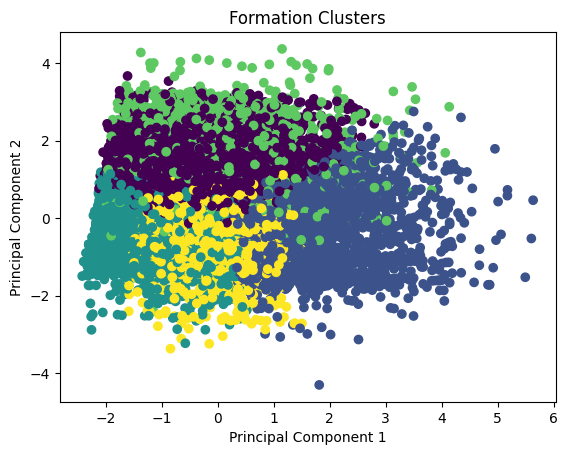

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Formation Clusters")
plt.show()


In [ ]:
# Find the most common offense formation per cluster
for cluster_num in range(kmeans.n_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    most_common_formation = cluster_data['offenseFormation'].mode()[0]
    print(f"Cluster {cluster_num}: Most common offenseFormation = {most_common_formation}")

# Analyze clusters by inspecting the most common formations
for cluster_num in range(kmeans.n_clusters):
    print(f"\nCluster {cluster_num} summary:")
    cluster_summary = data[data['Cluster'] == cluster_num].groupby('offenseFormation').size()
    print(cluster_summary)

Cluster 0: Most common offenseFormation = 4
Cluster 1: Most common offenseFormation = 4
Cluster 2: Most common offenseFormation = 4
Cluster 3: Most common offenseFormation = 0
Cluster 4: Most common offenseFormation = 4

Cluster 0 summary:
offenseFormation
1     214
2      58
3     111
4    2460
5     760
6      32
dtype: int64

Cluster 1 summary:
offenseFormation
0       3
1     211
2      26
3     134
4    2074
5     810
6      16
dtype: int64

Cluster 2 summary:
offenseFormation
1     394
2      26
3     238
4    2009
5    1381
6      21
dtype: int64

Cluster 3 summary:
offenseFormation
0    1339
2       1
dtype: int64

Cluster 4 summary:
offenseFormation
1     216
2      14
3     158
4    2248
5     964
6      18
dtype: int64


In [ ]:
# Analyze feature statistics for each cluster
for cluster_num in range(kmeans.n_clusters):
    print(f"\nCluster {cluster_num} Statistics:")
    cluster_stats = data[data['Cluster'] == cluster_num][features].describe()
    print(cluster_stats)


Cluster 0 Statistics:
       offenseFormation  receiverAlignment    yardsToGo         down  \
count        3635.00000        3635.000000  3635.000000  3635.000000   
mean            3.98762           4.817607     4.046768     2.668226   
std             0.93198           1.250875     2.614786     0.616656   
min             1.00000           0.000000     1.000000     1.000000   
25%             4.00000           4.000000     2.000000     2.000000   
50%             4.00000           4.000000     4.000000     3.000000   
75%             4.00000           6.000000     6.000000     3.000000   
max             6.00000          10.000000    15.000000     4.000000   

       gameClock_seconds  preSnapHomeScore  preSnapVisitorScore  
count        3635.000000       3635.000000           3635.00000  
mean          436.109216          9.083906              7.77304  
std           251.216300          7.668694              7.17901  
min             1.000000          0.000000              0.00000 

In [ ]:
# Filter data for specific formations and analyze their features
for formation in [4, 0]:
    print(f"\nAnalysis for Offense Formation {formation}:")
    formation_data = data[data['offenseFormation'] == formation]
    print(formation_data[features].describe())



Analysis for Offense Formation 4:
       offenseFormation  receiverAlignment    yardsToGo         down  \
count            8791.0        8791.000000  8791.000000  8791.000000   
mean                4.0           4.878285     8.627801     1.943806   
std                 0.0           1.070643     4.046406     0.840407   
min                 4.0           0.000000     1.000000     1.000000   
25%                 4.0           4.000000     6.000000     1.000000   
50%                 4.0           4.000000    10.000000     2.000000   
75%                 4.0           6.000000    10.000000     3.000000   
max                 4.0           7.000000    38.000000     4.000000   

       gameClock_seconds  preSnapHomeScore  preSnapVisitorScore  
count        8791.000000       8791.000000          8791.000000  
mean          408.191218         11.591855            10.491412  
std           272.769997          9.552201             9.406150  
min             1.000000          0.000000          

# Task 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("tracking_week_1.csv")

# Filter for a specific player, let's say player with nflId = 12345
print(df['nflId'].unique())

[35459. 39987. 41310. ... 53641. 48482. 54554.]


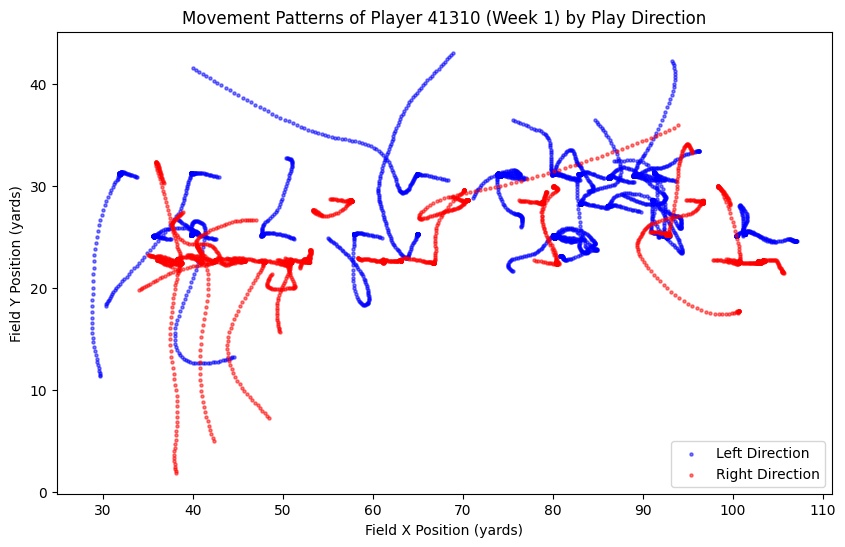

Player 41310 performance summary:
 - Total Distance Traveled: 720.78 yards
 - Max Speed: 6.60 yards/second
 - Average Speed: 0.72 yards/second
 - Max Acceleration: 4.04 yards/second^2


In [ ]:
# Filter for a specific player, let's say player with nflId = 12345
# player_id = 41310
player_data = df.copy()

player_id = 41310
player_data = player_data[player_data['nflId'] == player_id]

# player_data = player_data[player_data['playDirection'] == 'left']

# Clean data: remove rows where nflId is NA (which corresponds to the ball data)
player_data = player_data.dropna(subset=['nflId'])

# Fill missing 'dis' values with 0 using .loc
player_data.loc[:, 'dis'] = player_data['dis'].fillna(0)


# Convert 'time' column, handling invalid formats
player_data['time'] = pd.to_datetime(player_data['time'], errors='coerce')


# Calculate the time difference and speed using .loc to avoid the SettingWithCopyWarning
# Calculate time differences (in seconds)
player_data['time_diff'] = player_data['time'].diff().dt.total_seconds()

# Calculate speed (s) in yards per second using .loc to avoid the warning
player_data.loc[:, 'speed'] = player_data['dis'] / player_data['time_diff']
player_data.loc[:, 'speed'] = player_data['speed'].fillna(0)  # Replace NaN values with 0



# Calculate average speed over the course of the game
average_speed = player_data['speed'].mean()
# print(f"Average speed of player {player_id}: {average_speed:.2f} yards/second")

# Separate the data based on play direction
left_data = player_data[player_data['playDirection'] == 'left']
right_data = player_data[player_data['playDirection'] == 'right']

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot data for plays moving left
plt.scatter(left_data['x'], left_data['y'], c='blue', alpha=0.5, label='Left Direction', s=5)

# Plot data for plays moving right
plt.scatter(right_data['x'], right_data['y'], c='red', alpha=0.5, label='Right Direction', s=5)

# Add labels and title
plt.title(f"Movement Patterns of Player {player_id} (Week 1) by Play Direction")
plt.xlabel("Field X Position (yards)")
plt.ylabel("Field Y Position (yards)")

# Add a legend to differentiate between left and right directions
plt.legend()

# Display the plot
plt.show()

# Summary of key metrics
print(f"Player {player_id} performance summary:")
print(f" - Total Distance Traveled: {player_data['dis'].sum():.2f} yards")
print(f" - Max Speed: {player_data['speed'].max():.2f} yards/second")
print(f" - Average Speed: {average_speed:.2f} yards/second")
print(f" - Max Acceleration: {player_data['a'].max():.2f} yards/second^2")


## Player Analysis

In [ ]:
import pandas as pd

# Load tracking data for all weeks (1 to 9)
tracking_data = pd.concat([pd.read_csv(f"tracking_week_{i}.csv").assign(week=i) for i in range(1, 10)])

# Preview the data
print(tracking_data.head())


       gameId  playId    nflId     displayName  frameId    frameType  \
0  2022091200      64  35459.0  Kareem Jackson        1  BEFORE_SNAP   
1  2022091200      64  35459.0  Kareem Jackson        2  BEFORE_SNAP   
2  2022091200      64  35459.0  Kareem Jackson        3  BEFORE_SNAP   
3  2022091200      64  35459.0  Kareem Jackson        4  BEFORE_SNAP   
4  2022091200      64  35459.0  Kareem Jackson        5  BEFORE_SNAP   

                    time  jerseyNumber club playDirection      x      y     s  \
0  2022-09-13 00:16:03.5          22.0  DEN         right  51.06  28.55  0.72   
1  2022-09-13 00:16:03.6          22.0  DEN         right  51.13  28.57  0.71   
2  2022-09-13 00:16:03.7          22.0  DEN         right  51.20  28.59  0.69   
3  2022-09-13 00:16:03.8          22.0  DEN         right  51.26  28.62  0.67   
4  2022-09-13 00:16:03.9          22.0  DEN         right  51.32  28.65  0.65   

      a   dis       o    dir                 event  week  
0  0.37  0.07  246.17

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

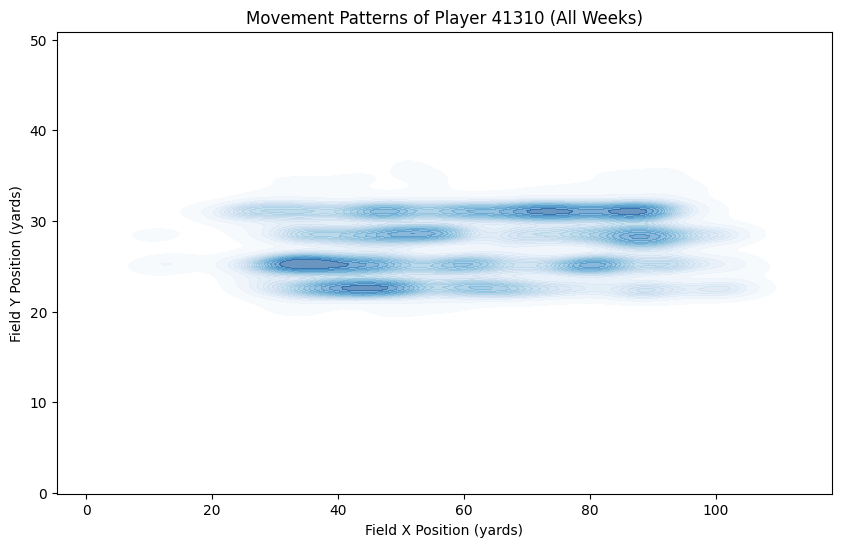

In [ ]:
# Filter for a specific player (player_id = 41310)
player_id = 41310
player_data = tracking_data[tracking_data['nflId'] == player_id]

# Clean data: remove rows where nflId is NA (which corresponds to the ball data)
player_data = player_data.dropna(subset=['nflId'])

# Fill missing 'dis' values with 0 using .loc
player_data.loc[:, 'dis'] = player_data['dis'].fillna(0)

# Convert 'time' column, handling invalid formats
player_data['time'] = pd.to_datetime(player_data['time'], errors='coerce')

# Calculate the time difference and speed using .loc to avoid the SettingWithCopyWarning
# Calculate time differences (in seconds)
player_data['time_diff'] = player_data['time'].diff().dt.total_seconds()

# Calculate speed (s) in yards per second using .loc to avoid the warning
player_data.loc[:, 'speed'] = player_data['dis'] / player_data['time_diff']
player_data.loc[:, 'speed'] = player_data['speed'].fillna(0)  # Replace NaN values with 0

# Calculate average speed over the course of the game
player_data['average_speed'] = player_data.groupby('week')['speed'].transform('mean')

# Movement Patterns: Identify key areas the player spends time on
# We can analyze their positions (x, y) and plot them over time for all weeks
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=player_data['x'], y=player_data['y'], cmap="Blues", fill=True, alpha=0.6, levels=20
)
plt.title(f"Movement Patterns of Player {player_id} (All Weeks)")
plt.xlabel("Field X Position (yards)")
plt.ylabel("Field Y Position (yards)")
plt.colorbar(label="Density")
plt.show()

Weekly Performance Summary:
   week  total_distance_traveled  max_speed  average_speed  max_acceleration
0     1                   720.78        6.6       0.722074              4.04
1     3                   815.10        6.6       0.616619              4.51
2     4                   702.27        6.0       0.588847              5.55
3     5                   440.72        5.5       0.588431              4.97
4     8                   380.55        6.6       0.717920              4.54
5     9                   424.02        6.3       0.607483              6.11


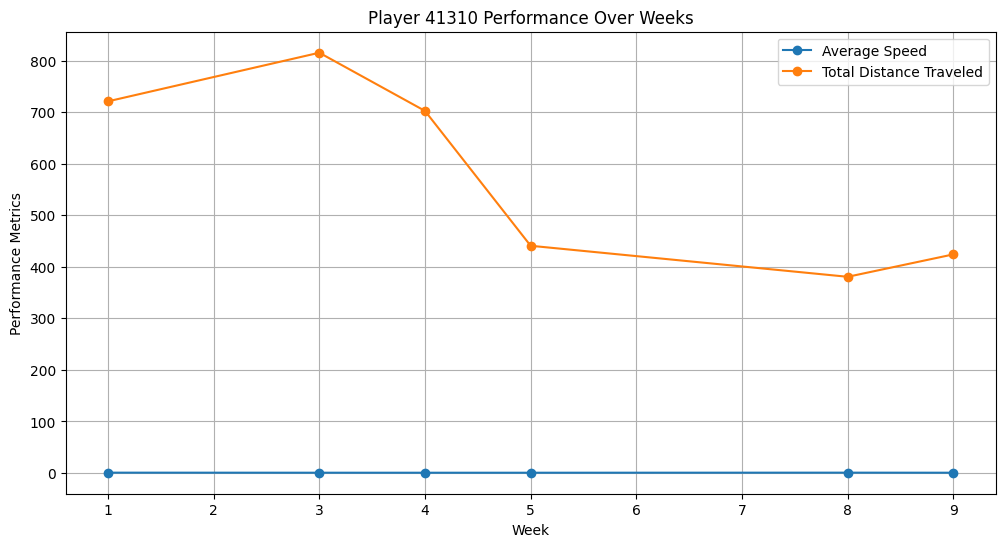

In [ ]:
# Summary of key metrics for all weeks
weekly_summary = player_data.groupby('week').agg(
    total_distance_traveled=('dis', 'sum'),
    max_speed=('speed', 'max'),
    average_speed=('average_speed', 'mean'),
    max_acceleration=('a', 'max')
).reset_index()

print("Weekly Performance Summary:")
print(weekly_summary)

# Plot player performance metrics over weeks to analyze trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week'], weekly_summary['average_speed'], marker='o', label='Average Speed')
plt.plot(weekly_summary['week'], weekly_summary['total_distance_traveled'], marker='o', label='Total Distance Traveled')
plt.title(f"Player {player_id} Performance Over Weeks")
plt.xlabel("Week")
plt.ylabel("Performance Metrics")
plt.legend()
plt.grid(True)
plt.show()

Performance Improvement/Degradation:
   week improvement
0     1   No Change
1     3    Degraded
2     4    Degraded
3     5    Degraded
4     8    Improved
5     9    Degraded


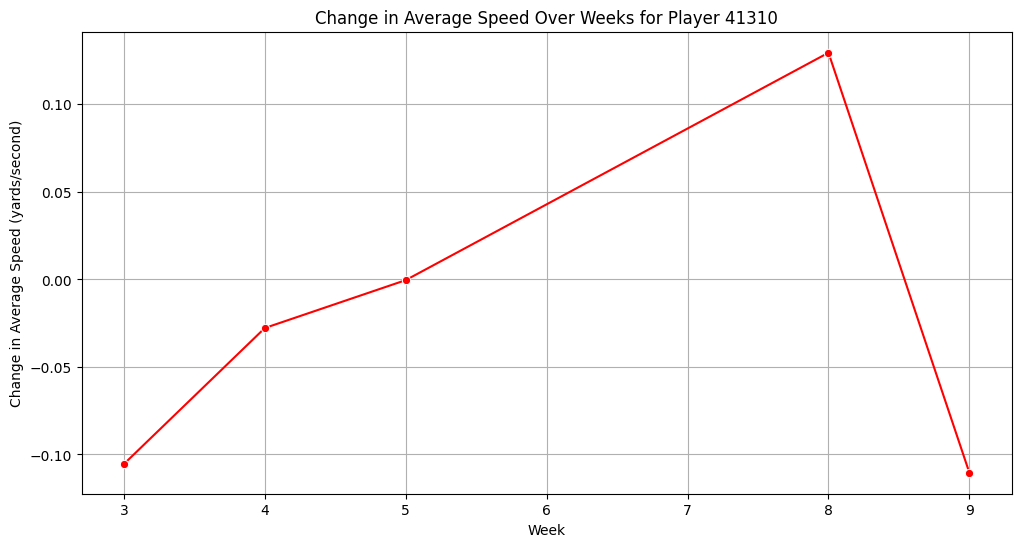

In [ ]:
# Calculate improvement or degradation based on average speed
# Here we use the change in average speed over the weeks to evaluate performance
weekly_summary['speed_change'] = weekly_summary['average_speed'].diff()

# Checking if the player is improving or degrading
weekly_summary['improvement'] = weekly_summary['speed_change'].apply(lambda x: 'Improved' if x > 0 else ('Degraded' if x < 0 else 'No Change'))

# Print improvements or degradations
print("Performance Improvement/Degradation:")
print(weekly_summary[['week', 'improvement']])

# Plot the improvement/degradation trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='speed_change', data=weekly_summary, marker='o', color='red')
plt.title(f"Change in Average Speed Over Weeks for Player {player_id}")
plt.xlabel("Week")
plt.ylabel("Change in Average Speed (yards/second)")
plt.grid(True)
plt.show()

In [ ]:
player_data['gameId'].unique()

array([2022091200])

In [ ]:
# Filter for a specific player, let's say player with nflId = 12345
# player_id = 41310
player_data = df.copy()


# # Clean data: remove rows where nflId is NA (which corresponds to the ball data)
# player_data = player_data.dropna(subset=['nflId'])

# Fill missing 'dis' values with 0 using .loc
player_data.loc[:, 'dis'] = player_data['dis'].fillna(0)


# Convert 'time' column, handling invalid formats
player_data['time'] = pd.to_datetime(player_data['time'], errors='coerce')


# Calculate the time difference and speed using .loc to avoid the SettingWithCopyWarning
# Calculate time differences (in seconds)
player_data['time_diff'] = player_data['time'].diff().dt.total_seconds()

# Calculate speed (s) in yards per second using .loc to avoid the warning
player_data.loc[:, 'speed'] = player_data['dis'] / player_data['time_diff']
player_data.loc[:, 'speed'] = player_data['speed'].fillna(0)  # Replace NaN values with 0

# Calculate average speed over the course of the game
average_speed = player_data['speed'].mean()
# print(f"Average speed of player {player_id}: {average_speed:.2f} yards/second")

# Movement Patterns: Identify key areas the player spends time on
# We can analyze their positions (x, y) and plot them over time
# plt.figure(figsize=(10, 6))
# plt.scatter(player_data['x'], player_data['y'], c=player_data['time'], cmap='viridis', alpha=0.5)
# plt.title(f"Movement Patterns of Player {player_id} (Week 1)")
# plt.xlabel("Field X Position (yards)")
# plt.ylabel("Field Y Position (yards)")
# plt.colorbar(label='Time')
# plt.show()

# # Summary of key metrics
# print(f"Player {player_id} performance summary:")
# print(f" - Total Distance Traveled: {player_data['dis'].sum():.2f} yards")
# print(f" - Max Speed: {player_data['speed'].max():.2f} yards/second")
# print(f" - Average Speed: {average_speed:.2f} yards/second")
# print(f" - Max Acceleration: {player_data['a'].max():.2f} yards/second^2")


In [ ]:
# Define field zones
def get_field_zone(x, y):
    if y < 10:
        return "Backfield"
    elif 10 <= y <= 30:
        return "Midfield"
    else:
        return "End Zone"

# Add field zone to data
player_data['field_zone'] = player_data.apply(lambda row: get_field_zone(row['x'], row['y']), axis=1)

# Calculate acceleration
player_data['acceleration'] = player_data['speed'].diff() / player_data['time_diff']

# Calculate time spent in each field zone
time_spent_in_zone = player_data.groupby('field_zone')['time_diff'].sum()
print(time_spent_in_zone)

# Example: Assigning speed categories (could be used for classification)
player_data['speed_category'] = pd.cut(player_data['speed'], bins=[0, 3, 6, 9, 12, 20], labels=['slow', 'average', 'fast', 'very fast', 'extremely fast'])

print(player_data.head())


field_zone
Backfield     13271.1
End Zone      39216.5
Midfield    -364563.8
Name: time_diff, dtype: float64
       gameId  playId    nflId     displayName  frameId    frameType  \
0  2022091200      64  35459.0  Kareem Jackson        1  BEFORE_SNAP   
1  2022091200      64  35459.0  Kareem Jackson        2  BEFORE_SNAP   
2  2022091200      64  35459.0  Kareem Jackson        3  BEFORE_SNAP   
3  2022091200      64  35459.0  Kareem Jackson        4  BEFORE_SNAP   
4  2022091200      64  35459.0  Kareem Jackson        5  BEFORE_SNAP   

                     time  jerseyNumber club playDirection  ...     a   dis  \
0 2022-09-13 00:16:03.500          22.0  DEN         right  ...  0.37  0.07   
1 2022-09-13 00:16:03.600          22.0  DEN         right  ...  0.36  0.07   
2 2022-09-13 00:16:03.700          22.0  DEN         right  ...  0.23  0.07   
3 2022-09-13 00:16:03.800          22.0  DEN         right  ...  0.22  0.07   
4 2022-09-13 00:16:03.900          22.0  DEN         right  ...

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Step 1: Drop rows with missing values in the relevant columns
player_data_cleaned = player_data.dropna(subset=['speed', 'acceleration', 'time_diff']).copy()

# Step 2: Extract features from the cleaned DataFrame
features_cleaned = player_data_cleaned[['speed', 'acceleration', 'time_diff']]

# Step 3: Scale the features
scaler = StandardScaler()
features_scaled_clean = scaler.fit_transform(features_cleaned)


# Apply KMeans clustering
kmeans = KMeans(n_clusters=2)
player_data_cleaned['play_type'] = kmeans.fit_predict(features_scaled_clean)

print(player_data_cleaned.head())


       gameId  playId    nflId     displayName  frameId    frameType  \
1  2022091200      64  35459.0  Kareem Jackson        2  BEFORE_SNAP   
2  2022091200      64  35459.0  Kareem Jackson        3  BEFORE_SNAP   
3  2022091200      64  35459.0  Kareem Jackson        4  BEFORE_SNAP   
4  2022091200      64  35459.0  Kareem Jackson        5  BEFORE_SNAP   
7  2022091200      64  35459.0  Kareem Jackson        8  BEFORE_SNAP   

                     time  jerseyNumber club playDirection  ...   dis       o  \
1 2022-09-13 00:16:03.600          22.0  DEN         right  ...  0.07  245.41   
2 2022-09-13 00:16:03.700          22.0  DEN         right  ...  0.07  244.45   
3 2022-09-13 00:16:03.800          22.0  DEN         right  ...  0.07  244.45   
4 2022-09-13 00:16:03.900          22.0  DEN         right  ...  0.07  245.74   
7 2022-09-13 00:16:04.200          22.0  DEN         right  ...  0.06  251.03   

     dir  event  time_diff  speed  field_zone acceleration  speed_category  \
1 

Confusion Matrix:
 [[2891733  727294]
 [1740380  324750]]

Accuracy Score: 0.5658680785910734

Classification Report:
               precision    recall  f1-score   support

        pass       0.62      0.80      0.70   3619027
         run       0.31      0.16      0.21   2065130

    accuracy                           0.57   5684157
   macro avg       0.47      0.48      0.45   5684157
weighted avg       0.51      0.57      0.52   5684157



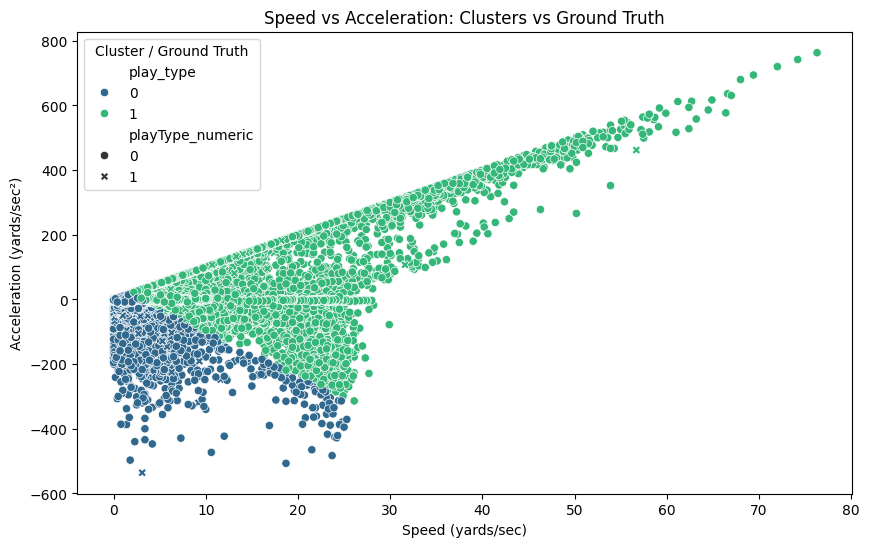

In [ ]:
plays = pd.read_csv("plays.csv")
plays['playType'] = plays.apply(lambda row: 'pass' if row['isDropback'] else 'run', axis=1)

# Step 1: Merge ground truth playType from plays dataset
player_data_cleaned = player_data_cleaned.merge(
    plays[['gameId', 'playId', 'playType']],
    on=['gameId', 'playId'],
    how='left'
)

# Step 2: Map ground truth 'playType' to numeric values for comparison
play_type_mapping = {'pass': 0, 'run': 1}  # Assuming only 'pass' and 'run' exist
player_data_cleaned['playType_numeric'] = player_data_cleaned['playType'].map(play_type_mapping)

# Step 3: Evaluate clustering results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(
    player_data_cleaned['playType_numeric'],
    player_data_cleaned['play_type']
)

# Accuracy score
accuracy = accuracy_score(
    player_data_cleaned['playType_numeric'],
    player_data_cleaned['play_type']
)

# Classification report
class_report = classification_report(
    player_data_cleaned['playType_numeric'],
    player_data_cleaned['play_type'],
    target_names=['pass', 'run']
)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", class_report)

# Step 4: Visualize clusters and ground truth
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of speed vs. acceleration, colored by predicted play_type
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=player_data_cleaned['speed'],
    y=player_data_cleaned['acceleration'],
    hue=player_data_cleaned['play_type'],
    palette='viridis',
    style=player_data_cleaned['playType_numeric']
)
plt.title("Speed vs Acceleration: Clusters vs Ground Truth")
plt.xlabel("Speed (yards/sec)")
plt.ylabel("Acceleration (yards/sec²)")
plt.legend(title='Cluster / Ground Truth')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'play_type' is the label column
X = player_data_cleaned[['speed', 'acceleration', 'time_diff']]
y = player_data_cleaned['play_type']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Model evaluation
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [ ]:
# Filter for a specific player, let's say player with nflId = 12345
# player_id = 41310
# Load the dataset
df = pd.read_csv("tracking_week_1.csv")

player_data = df.copy()


# # Clean data: remove rows where nflId is NA (which corresponds to the ball data)
# player_data = player_data.dropna(subset=['nflId'])

# Fill missing 'dis' values with 0 using .loc
player_data.loc[:, 'dis'] = player_data['dis'].fillna(0)


# Convert 'time' column, handling invalid formats
player_data['time'] = pd.to_datetime(player_data['time'], errors='coerce')


# Calculate the time difference and speed using .loc to avoid the SettingWithCopyWarning
# Calculate time differences (in seconds)
player_data['time_diff'] = player_data['time'].diff().dt.total_seconds()

# Calculate speed (s) in yards per second using .loc to avoid the warning
player_data.loc[:, 'speed'] = player_data['dis'] / player_data['time_diff']
player_data.loc[:, 'speed'] = player_data['speed'].fillna(0)  # Replace NaN values with 0

# Calculate average speed over the course of the game
average_speed = player_data['speed'].mean()
# print(f"Average speed of player {player_id}: {average_speed:.2f} yards/second")

# Define field zones
def get_field_zone(x, y):
    if y < 10:
        return "Backfield"
    elif 10 <= y <= 30:
        return "Midfield"
    else:
        return "End Zone"

# Add field zone to data
player_data['field_zone'] = player_data.apply(lambda row: get_field_zone(row['x'], row['y']), axis=1)

# Calculate acceleration
player_data['acceleration'] = player_data['speed'].diff() / player_data['time_diff']

# Calculate time spent in each field zone
time_spent_in_zone = player_data.groupby('field_zone')['time_diff'].sum()
print(time_spent_in_zone)

# Example: Assigning speed categories (could be used for classification)
player_data['speed_category'] = pd.cut(player_data['speed'], bins=[0, 3, 6, 9, 12, 20], labels=['slow', 'average', 'fast', 'very fast', 'extremely fast'])

print(player_data.head())

# Step 1: Drop rows with missing values in the relevant columns
player_data_cleaned = player_data.dropna(subset=['speed', 'acceleration', 'time_diff']).copy()

plays = pd.read_csv("plays.csv")
plays['playType'] = plays.apply(lambda row: 'pass' if row['isDropback'] else 'run', axis=1)

# Step 1: Merge ground truth playType from plays dataset
player_data_cleaned = player_data_cleaned.merge(
    plays[['gameId', 'playId', 'playType']],
    on=['gameId', 'playId'],
    how='left'
)

# Step 2: Map ground truth 'playType' to numeric values for comparison
play_type_mapping = {'pass': 0, 'run': 1}  # Assuming only 'pass' and 'run' exist
player_data_cleaned['play_type'] = player_data_cleaned['playType'].map(play_type_mapping)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'play_type' is the label column
X = player_data_cleaned[['speed', 'acceleration', 'time_diff', ]]
y = player_data_cleaned['play_type']

print(X.head())
print(y.head())

field_zone
Backfield     13271.1
End Zone      39216.5
Midfield    -364563.8
Name: time_diff, dtype: float64
       gameId  playId    nflId     displayName  frameId    frameType  \
0  2022091200      64  35459.0  Kareem Jackson        1  BEFORE_SNAP   
1  2022091200      64  35459.0  Kareem Jackson        2  BEFORE_SNAP   
2  2022091200      64  35459.0  Kareem Jackson        3  BEFORE_SNAP   
3  2022091200      64  35459.0  Kareem Jackson        4  BEFORE_SNAP   
4  2022091200      64  35459.0  Kareem Jackson        5  BEFORE_SNAP   

                     time  jerseyNumber club playDirection  ...     a   dis  \
0 2022-09-13 00:16:03.500          22.0  DEN         right  ...  0.37  0.07   
1 2022-09-13 00:16:03.600          22.0  DEN         right  ...  0.36  0.07   
2 2022-09-13 00:16:03.700          22.0  DEN         right  ...  0.23  0.07   
3 2022-09-13 00:16:03.800          22.0  DEN         right  ...  0.22  0.07   
4 2022-09-13 00:16:03.900          22.0  DEN         right  ...

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Model evaluation
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("tracking_week_1.csv")
plays = pd.read_csv("plays.csv")

# Preprocessing
player_data = df.copy()

# Filter out rows where frameType is BEFORE_SNAP
player_data = player_data[player_data['frameType'] != 'AFTER_SNAP']

# Fill missing 'dis' values with 0
player_data.loc[:, 'dis'] = player_data['dis'].fillna(0)

# Convert 'time' column
player_data['time'] = pd.to_datetime(player_data['time'], errors='coerce')

# Calculate time differences (in seconds) and speed
player_data['time_diff'] = player_data['time'].diff().dt.total_seconds()
player_data['speed'] = player_data['dis'] / player_data['time_diff']
player_data['speed'] = player_data['speed'].fillna(0)

# Define field zones
def get_field_zone(x, y):
    if y < 10:
        return "Backfield"
    elif 10 <= y <= 30:
        return "Midfield"
    else:
        return "End Zone"

player_data['field_zone'] = player_data.apply(lambda row: get_field_zone(row['x'], row['y']), axis=1)

# Calculate acceleration
player_data['acceleration'] = player_data['speed'].diff() / player_data['time_diff']

# Drop rows with missing values in relevant columns
player_data_cleaned = player_data.dropna(subset=['speed', 'acceleration', 'time_diff']).copy()

# Add playType information
plays['playType'] = plays.apply(lambda row: 'pass' if row['isDropback'] else 'run', axis=1)
player_data_cleaned = player_data_cleaned.merge(
    plays[['gameId', 'playId', 'playType', 'possessionTeam']],
    on=['gameId', 'playId'],
    how='left'
)

# Map playType to numeric values
play_type_mapping = {'pass': 0, 'run': 1}
player_data_cleaned['play_type'] = player_data_cleaned['playType'].map(play_type_mapping)

# Filter out rows where 'club' does not match 'possessionTeam'
player_data_cleaned = player_data_cleaned[player_data_cleaned['club'] == player_data_cleaned['possessionTeam']].copy()

# Group by nflId, gameId, and playId, and calculate mean for speed and acceleration
aggregated_data = player_data_cleaned.groupby(['nflId', 'gameId', 'playId', 'field_zone']).agg({
    'speed': 'mean',
    'acceleration': 'mean',
    'play_type': 'first'  # All entries in a group have the same play_type
}).reset_index()

# Encode field_zone as categorical variable
aggregated_data['field_zone'] = aggregated_data['field_zone'].astype('category')
aggregated_data['field_zone_encoded'] = aggregated_data['field_zone'].cat.codes

# # Encode offensive_player as a categorical variable
# aggregated_data['offensive_player_encoded'] = aggregated_data['offensive_player'].map({'offensive': 0, 'defensive': 1})

# Prepare features (X) and target (y)
X = aggregated_data[['speed', 'acceleration', 'field_zone_encoded']]
y = aggregated_data['play_type']

print(X.head())
print(y.head())



      speed  acceleration  field_zone_encoded
0  0.012500      0.000000                   2
1  0.137500      0.175000                   2
2  0.097980      0.101837                   2
3  0.058187      0.090856                   2
4  0.106069      0.121127                   2
0    0
1    1
2    0
3    1
4    1
Name: play_type, dtype: int64


In [ ]:
aggregated_data['offensive_player_encoded'].unique()

array([0, 1])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model evaluation
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.55


In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

xgb_accuracy = xgb_clf.score(X_test, y_test)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.2f}")


XGBoost Model Accuracy: 0.62


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

svm_accuracy = svm_clf.score(X_test, y_test)
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")


SVM Model Accuracy: 0.62


## Using user data who are close to the ball only

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("tracking_week_1.csv")
plays = pd.read_csv("plays.csv")

# Preprocessing
player_data = df.copy()

# Filter out rows where frameType is BEFORE_SNAP
player_data = player_data[player_data['frameType'] == 'AFTER_SNAP']

# Fill missing 'dis' values with 0
player_data.loc[:, 'dis'] = player_data['dis'].fillna(0)

# Convert 'time' column
player_data['time'] = pd.to_datetime(player_data['time'], errors='coerce')

# Calculate time differences (in seconds) and speed
player_data['time_diff'] = player_data['time'].diff().dt.total_seconds()
player_data['speed'] = player_data['dis'] / player_data['time_diff']
player_data['speed'] = player_data['speed'].fillna(0)

# Define field zones
def get_field_zone(x, y):
    if y < 10:
        return "Backfield"
    elif 10 <= y <= 30:
        return "Midfield"
    else:
        return "End Zone"

player_data['field_zone'] = player_data.apply(lambda row: get_field_zone(row['x'], row['y']), axis=1)

# Calculate acceleration
player_data['acceleration'] = player_data['speed'].diff() / player_data['time_diff']

# Drop rows with missing values in relevant columns
player_data_cleaned = player_data.dropna(subset=['speed', 'acceleration', 'time_diff']).copy()

# Remove rows where nflId is NA (indicating the ball's position)
player_data_cleaned = player_data_cleaned[player_data_cleaned['nflId'].notna()]

# Add playType information
plays['playType'] = plays.apply(lambda row: 'pass' if row['isDropback'] else 'run', axis=1)
player_data_cleaned = player_data_cleaned.merge(
    plays[['gameId', 'playId', 'playType', 'possessionTeam']],
    on=['gameId', 'playId'],
    how='left'
)

# Map playType to numeric values
play_type_mapping = {'pass': 0, 'run': 1}
player_data_cleaned['play_type'] = player_data_cleaned['playType'].map(play_type_mapping)

# Filter out rows where 'club' does not match 'possessionTeam'
player_data_cleaned = player_data_cleaned[player_data_cleaned['club'] == player_data_cleaned['possessionTeam']].copy()

# Identify rows where nflId is NA (ball's position)
ball_data = player_data[player_data['nflId'].isna()][['gameId', 'playId', 'x', 'y']]

# Rename columns for clarity
ball_data = ball_data.rename(columns={'x': 'ball_x', 'y': 'ball_y'})

# Merge ball data with player data
player_data_with_ball = player_data_cleaned.merge(
    ball_data,
    on=['gameId', 'playId'],
    how='left'
)

# Calculate distance of each player from the ball
player_data_with_ball['distance_to_ball'] = np.sqrt(
    (player_data_with_ball['x'] - player_data_with_ball['ball_x']) ** 2 +
    (player_data_with_ball['y'] - player_data_with_ball['ball_y']) ** 2
)

# Define a threshold for nearby players (e.g., within 5 yards)
threshold_distance = 5

# Filter to keep only players near the ball
nearby_players_data = player_data_with_ball[player_data_with_ball['distance_to_ball'] <= threshold_distance].copy()

# Proceed with the same grouping and aggregation
aggregated_data = nearby_players_data.groupby(['nflId', 'gameId', 'playId', 'field_zone']).agg({
    'speed': 'mean',
    'acceleration': 'mean',
    'play_type': 'first'  # All entries in a group have the same play_type
}).reset_index()

# Encode field_zone as a categorical variable
aggregated_data['field_zone'] = aggregated_data['field_zone'].astype('category')
aggregated_data['field_zone_encoded'] = aggregated_data['field_zone'].cat.codes

# Prepare features (X) and target (y)
X = aggregated_data[['speed', 'acceleration', 'field_zone_encoded']]
y = aggregated_data['play_type']

print(X.head())
print(y.head())


In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("tracking_week_1.csv")
plays = pd.read_csv("plays.csv")

# Filter out rows where nflId is NA (ball's position)
ball_data = df[df['nflId'].isna()][['gameId', 'playId', 'x', 'y']]

# Define field zones based on 'y' position of the ball
def get_field_zone(x, y):
    if y < 10:
        return "Backfield"
    elif 10 <= y <= 30:
        return "Midfield"
    else:
        return "End Zone"

ball_data['field_zone'] = ball_data.apply(lambda row: get_field_zone(row['x'], row['y']), axis=1)

# Merge ball data with play information
ball_data = ball_data.merge(
    plays[['gameId', 'playId', 'isDropback', 'possessionTeam']],
    on=['gameId', 'playId'],
    how='left'
)

# Add play type (pass or run)
ball_data['play_type'] = ball_data['isDropback'].map({True: 0, False: 1})

# Drop unnecessary columns
ball_data = ball_data.drop(columns=['isDropback'])

# Encode field_zone as a categorical variable
ball_data['field_zone_encoded'] = ball_data['field_zone'].astype('category').cat.codes

# Prepare features (X) and target (y)
X = ball_data[['x', 'y', 'field_zone_encoded']]
y = ball_data['play_type']

# Check the prepared data
print(X.head())
print(y.head())


           x          y  field_zone_encoded
0  39.470001  23.870001                   2
1  39.480000  23.870001                   2
2  39.480000  23.870001                   2
3  39.480000  23.870001                   2
4  39.480000  23.870001                   2
0    1
1    1
2    1
3    1
4    1
Name: play_type, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model evaluation
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.59


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("tracking_week_1.csv")
plays = pd.read_csv("plays.csv")

# Filter out rows where nflId is NA (ball data only)
ball_data = df[df['nflId'].isna()].copy()

# Fill missing 'dis' values with 0 (distance)
ball_data['dis'] = ball_data['dis'].fillna(0)

# Convert 'time' column to datetime
ball_data['time'] = pd.to_datetime(ball_data['time'], errors='coerce')

# Calculate time differences (in seconds)
ball_data['time_diff'] = ball_data['time'].diff().dt.total_seconds()
ball_data['speed'] = ball_data['dis'] / ball_data['time_diff']
ball_data['speed'] = ball_data['speed'].fillna(0)

# Calculate acceleration (change in speed over time_diff)
ball_data['acceleration'] = ball_data['speed'].diff() / ball_data['time_diff']
ball_data['acceleration'] = ball_data['acceleration'].fillna(0)

# Define field zones based on y-position
def get_field_zone(x, y):
    if y < 10:
        return "Backfield"
    elif 10 <= y <= 30:
        return "Midfield"
    else:
        return "End Zone"

ball_data['field_zone'] = ball_data.apply(lambda row: get_field_zone(row['x'], row['y']), axis=1)

# Create 5-second frame grouping for each game and play
ball_data['frame_group'] = ball_data.groupby(['gameId', 'playId']).cumcount() // 5 + 1

# Merge play information for playType (pass or run)
plays['playType'] = plays.apply(lambda row: 'pass' if row['isDropback'] else 'run', axis=1)
ball_data_with_play = ball_data.merge(
    plays[['gameId', 'playId', 'playType']],
    on=['gameId', 'playId'],
    how='left'
)

# Map playType to numeric values (0 for pass, 1 for run)
play_type_mapping = {'pass': 0, 'run': 1}
ball_data_with_play['play_type'] = ball_data_with_play['playType'].map(play_type_mapping)

# Encode field_zone as a categorical variable
ball_data_with_play['field_zone_encoded'] = ball_data_with_play['field_zone'].astype('category').cat.codes

# Reshape the data to create a single sample per play (using multiple 5-second frames)

# Create a list to store the reshaped data
reshaped_data = []

# Iterate through each gameId and playId
for (game_id, play_id), group in ball_data_with_play.groupby(['gameId', 'playId']):
    # Create lists for features and target for each play
    feature_list = []

    # For each frame (5-second window), concatenate speed, acceleration, and field_zone_encoded
    for frame in range(1, group['frame_group'].max() + 1):
        frame_data = group[group['frame_group'] == frame]

        if frame_data.shape[0] > 0:  # Only process if data exists for the frame
            speed_values = frame_data['speed'].values
            acceleration_values = frame_data['acceleration'].values
            field_zone_values = frame_data['field_zone_encoded'].values

            # If frame has multiple entries, stack them
            feature_list.extend([speed_values[0], acceleration_values[0], field_zone_values[0]])
        else:
            # If there's no data for a specific frame, append zeros (or handle as appropriate)
            feature_list.extend([0, 0, 0])

    # Prepare features and target for the current play
    features = np.array(feature_list)
    target = group['play_type'].iloc[0]  # All rows in a play have the same play_type

    reshaped_data.append((features, target))

# Convert to DataFrame
features_list, target_list = zip(*reshaped_data)
X = np.array(features_list)
y = np.array(target_list)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1952,) + inhomogeneous part.

# TASK 5 : Run vs pass classigication using Trcking Data for the first second after snap

In [ ]:
import pandas as pd

# Load tracking data for all weeks
tracking_data_store = pd.concat([pd.read_csv(f"tracking_week_{i}.csv") for i in range(1, 10)])

# Load playType (ground truth) data
plays = pd.read_csv("plays.csv")


In [ ]:
# # Filter tracking data to include only BEFORE_SNAP and SNAP frames
# tracking_data = tracking_data_store[tracking_data_store['frameType'].isin(['AFTER_SNAP', 'SNAP'])].copy()

# tracking_data = tracking_data[tracking_data['nflId'].notna()]
# tracking_data = tracking_data.dropna(subset=['time'])
# # Ensure the timestamp column is in datetime format
# tracking_data['time'] = pd.to_datetime(tracking_data['time'], errors='coerce')

# # Identify the SNAP frame as the reference for time calculation
# snap_frames = tracking_data[tracking_data['frameType'] == 'SNAP']

# # Merge the SNAP time back into the tracking data
# tracking_data = tracking_data.merge(
#     snap_frames[['gameId', 'playId', 'time']],
#     on=['gameId', 'playId'],
#     suffixes=('', '_snap'),
#     how='left'
# )

# # Calculate the time difference in seconds from the SNAP frame
# tracking_data['time_from_snap'] = (tracking_data['time'] - tracking_data['time_snap']).dt.total_seconds()

# Filter for rows within the first second after SNAP (time_from_snap between 0 and 1, inclusive)
tracking_data_filtered = tracking_data[
    (tracking_data['time_from_snap'] >= 0) &
    (tracking_data['time_from_snap'] <= 1)
]

# Drop the auxiliary columns if not needed
tracking_data_filtered = tracking_data_filtered.drop(columns=['time_snap', 'time_from_snap'])

# Add playType information
plays['playType'] = plays.apply(lambda row: 'pass' if row['isDropback'] else 'run', axis=1)

# Merge playType with tracking data
tracking_data_filtered = tracking_data_filtered.merge(
    plays[['gameId', 'playId', 'playType', 'possessionTeam']],
    on=['gameId', 'playId'],
    how='left'
)


In [ ]:
# Group by gameId and playId to calculate play-level aggregated features
def aggregate_features(group):
    return pd.Series({
        'mean_speed': group['s'].mean(),
        'max_speed': group['s'].max(),
        'mean_acceleration': group['a'].mean(),
        'max_acceleration': group['a'].max(),
        'mean_distance': group['dis'].mean(),
        'max_distance': group['dis'].max(),
        'mean_orientation': group['o'].mean(),
        'std_orientation': group['o'].std(),
        'mean_motion_angle': group['dir'].mean(),
        'std_motion_angle': group['dir'].std(),
    })

# Aggregate play-level features
play_features = (
    tracking_data_filtered.groupby(['gameId', 'playId'], group_keys=False)  # Avoid including grouping columns in the results
    .apply(aggregate_features)
    .reset_index()
)



<ipython-input-45-1eb168e0838a>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregate_features)


In [ ]:
# Flag offense team players (if club matches possessionTeam)
tracking_data_filtered['isOffense'] = tracking_data_filtered['club'] == tracking_data_filtered['possessionTeam']

# Separate offense and defense features
def team_features(group):
    offense = group[group['isOffense']]
    defense = group[~group['isOffense']]
    return pd.Series({
        'offense_speed_mean': offense['s'].mean(),
        'defense_speed_mean': defense['s'].mean(),
        'offense_acceleration_mean': offense['a'].mean(),
        'defense_acceleration_mean': defense['a'].mean(),
    })

team_features = (
    tracking_data_filtered.groupby(['gameId', 'playId'], group_keys=False)
    .apply(team_features)
    .reset_index()
)


<ipython-input-46-822f8e28964e>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(team_features)


In [ ]:
# Merge all aggregated features
features = play_features.merge(team_features, on=['gameId', 'playId'])
features = features.merge(plays[['gameId', 'playId', 'playType']], on=['gameId', 'playId'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode playType (target variable)
label_encoder = LabelEncoder()
features['playType'] = label_encoder.fit_transform(features['playType'])  # 0 for run, 1 for pass

# Split data
X = features.drop(columns=['gameId', 'playId', 'playType'])
y = features['playType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train XGBoost model
model = XGBClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        pass       0.79      0.83      0.81      1701
         run       0.74      0.69      0.71      1195

    accuracy                           0.77      2896
   macro avg       0.76      0.76      0.76      2896
weighted avg       0.77      0.77      0.77      2896



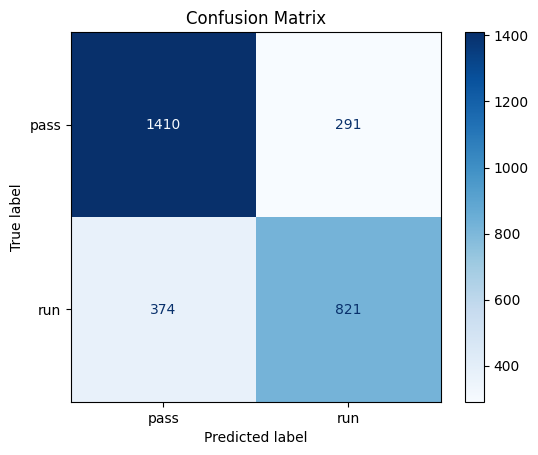

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')  # Optional: use a colormap for better visuals
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

xgb_accuracy = xgb_clf.score(X_test, y_test)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.2f}")

XGBoost Model Accuracy: 0.59


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        pass       0.79      0.83      0.81      1701
         run       0.74      0.69      0.71      1195

    accuracy                           0.77      2896
   macro avg       0.77      0.76      0.76      2896
weighted avg       0.77      0.77      0.77      2896



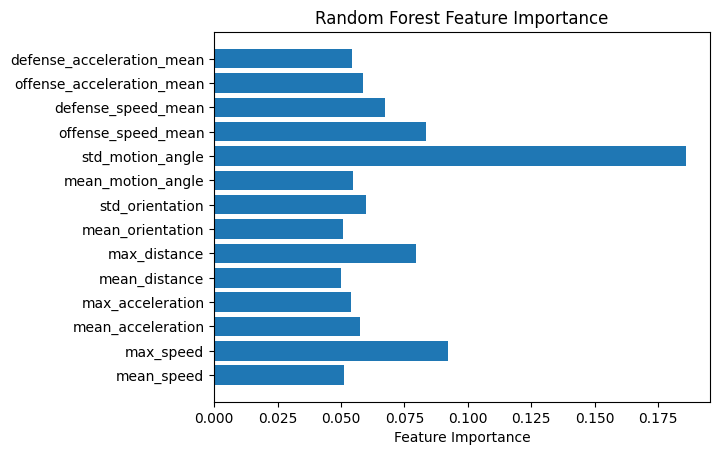

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
importance = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")


Cross-Validation Accuracy: 0.60


# Player analysis

In [ ]:
import pandas as pd

# Load tracking data for all weeks (1 to 9)
tracking_data = pd.concat([pd.read_csv(f"tracking_week_{i}.csv").assign(week=i) for i in range(1, 10)])

# Preview the data
print(tracking_data.head())


       gameId  playId    nflId     displayName  frameId    frameType  \
0  2022091200      64  35459.0  Kareem Jackson        1  BEFORE_SNAP   
1  2022091200      64  35459.0  Kareem Jackson        2  BEFORE_SNAP   
2  2022091200      64  35459.0  Kareem Jackson        3  BEFORE_SNAP   
3  2022091200      64  35459.0  Kareem Jackson        4  BEFORE_SNAP   
4  2022091200      64  35459.0  Kareem Jackson        5  BEFORE_SNAP   

                    time  jerseyNumber club playDirection      x      y     s  \
0  2022-09-13 00:16:03.5          22.0  DEN         right  51.06  28.55  0.72   
1  2022-09-13 00:16:03.6          22.0  DEN         right  51.13  28.57  0.71   
2  2022-09-13 00:16:03.7          22.0  DEN         right  51.20  28.59  0.69   
3  2022-09-13 00:16:03.8          22.0  DEN         right  51.26  28.62  0.67   
4  2022-09-13 00:16:03.9          22.0  DEN         right  51.32  28.65  0.65   

      a   dis       o    dir                 event  week  
0  0.37  0.07  246.17

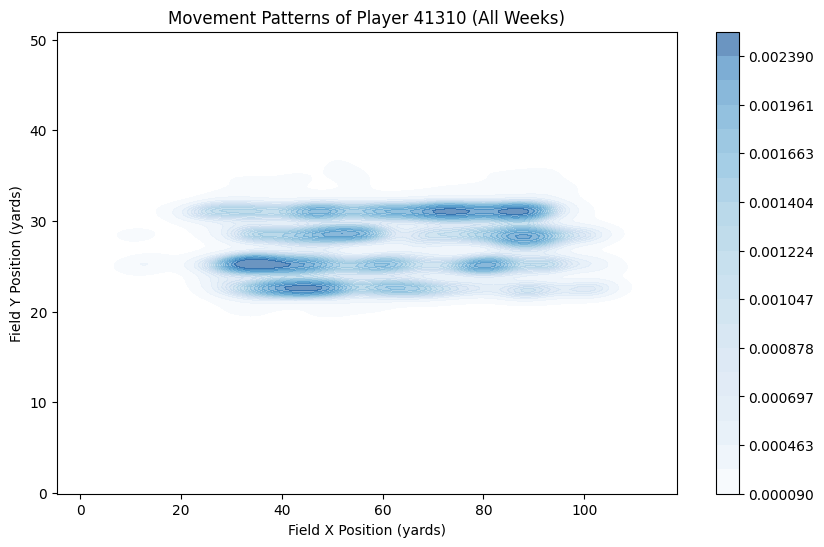

In [ ]:
# Filter for a specific player (player_id = 41310)
player_id = 41310
player_data = tracking_data[tracking_data['nflId'] == player_id]

# Clean data: remove rows where nflId is NA (which corresponds to the ball data)
player_data = player_data.dropna(subset=['nflId'])

# Fill missing 'dis' values with 0 using .loc
player_data.loc[:, 'dis'] = player_data['dis'].fillna(0)

# Convert 'time' column, handling invalid formats
player_data['time'] = pd.to_datetime(player_data['time'], errors='coerce')

# Calculate the time difference and speed using .loc to avoid the SettingWithCopyWarning
# Calculate time differences (in seconds)
player_data['time_diff'] = player_data['time'].diff().dt.total_seconds()

# Calculate speed (s) in yards per second using .loc to avoid the warning
player_data.loc[:, 'speed'] = player_data['dis'] / player_data['time_diff']
player_data.loc[:, 'speed'] = player_data['speed'].fillna(0)  # Replace NaN values with 0

# Calculate average speed over the course of the game
player_data['average_speed'] = player_data.groupby('week')['speed'].transform('mean')

# Movement Patterns: Identify key areas the player spends time on
# We can analyze their positions (x, y) and plot them over time for all weeks
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=player_data['x'],
    y=player_data['y'],
    cmap="Blues",
    fill=True,
    alpha=0.6,
    levels=20,
    cbar=True  # Add this parameter to include a color bar
)
plt.title(f"Movement Patterns of Player {player_id} (All Weeks)")
plt.xlabel("Field X Position (yards)")
plt.ylabel("Field Y Position (yards)")
plt.show()


Weekly Performance Summary:
   week  total_distance_traveled  max_speed  average_speed  max_acceleration
0     1                   720.78        6.6       0.722074              4.04
1     3                   815.10        6.6       0.616619              4.51
2     4                   702.27        6.0       0.588847              5.55
3     5                   440.72        5.5       0.588431              4.97
4     8                   380.55        6.6       0.717920              4.54
5     9                   424.02        6.3       0.607483              6.11


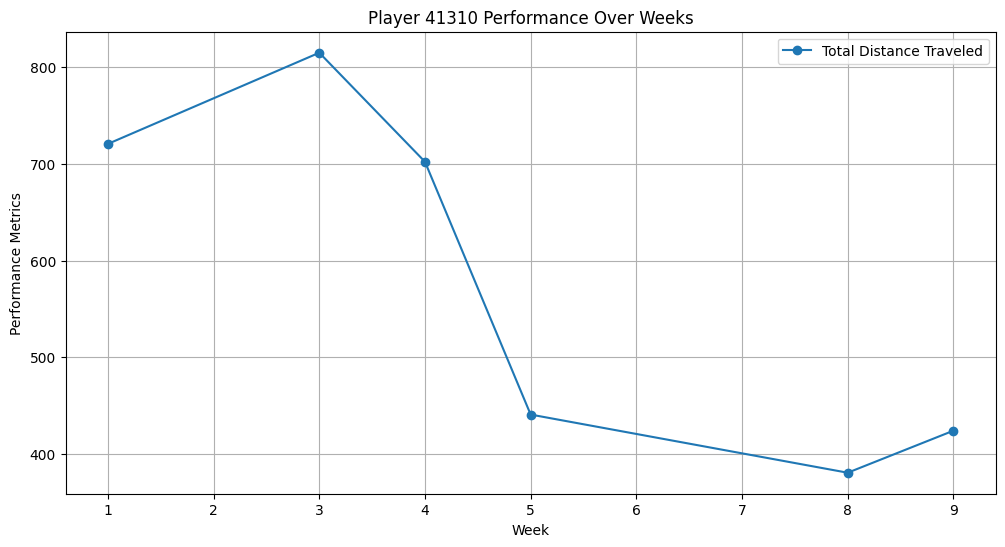

In [ ]:
# Summary of key metrics for all weeks
weekly_summary = player_data.groupby('week').agg(
    total_distance_traveled=('dis', 'sum'),
    max_speed=('speed', 'max'),
    average_speed=('average_speed', 'mean'),
    max_acceleration=('a', 'max')
).reset_index()

print("Weekly Performance Summary:")
print(weekly_summary)

# Plot player performance metrics over weeks to analyze trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week'], weekly_summary['total_distance_traveled'], marker='o', label='Total Distance Traveled')
plt.title(f"Player {player_id} Performance Over Weeks")
plt.xlabel("Week")
plt.ylabel("Performance Metrics")
plt.legend()
plt.grid(True)
plt.show()

Performance Improvement/Degradation:
   week improvement
0     1   No Change
1     3    Degraded
2     4    Degraded
3     5    Degraded
4     8    Improved
5     9    Degraded


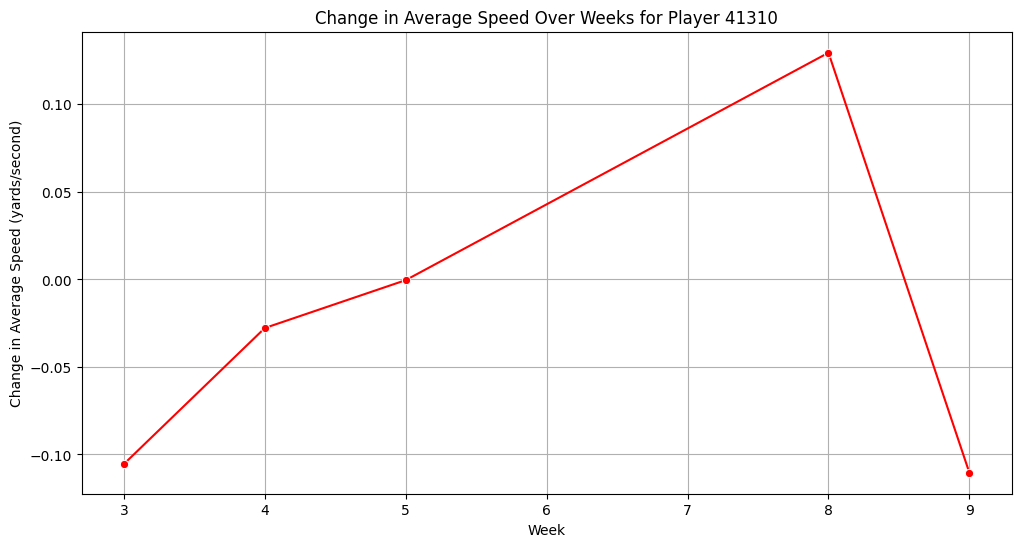

In [ ]:
# Calculate improvement or degradation based on average speed
# Here we use the change in average speed over the weeks to evaluate performance
weekly_summary['speed_change'] = weekly_summary['average_speed'].diff()

# Checking if the player is improving or degrading
weekly_summary['improvement'] = weekly_summary['speed_change'].apply(lambda x: 'Improved' if x > 0 else ('Degraded' if x < 0 else 'No Change'))

# Print improvements or degradations
print("Performance Improvement/Degradation:")
print(weekly_summary[['week', 'improvement']])

# Plot the improvement/degradation trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='speed_change', data=weekly_summary, marker='o', color='red')
plt.title(f"Change in Average Speed Over Weeks for Player {player_id}")
plt.xlabel("Week")
plt.ylabel("Change in Average Speed (yards/second)")
plt.grid(True)
plt.show()

# Top 50 players analysis using two approaches

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
player_play_data = pd.read_csv("player_play.csv")

# Select key attributes and fill missing values
attributes = [
    "rushingYards", "receivingYards", "yardageGainedAfterTheCatch",
    "passingYards", "sackYardsAsDefense", "forcedFumbleAsDefense",
    "soloTackle", "hadInterception", "causedPressure"
]
player_play_data[attributes] = player_play_data[attributes].fillna(0)

# Normalize attributes
scaler = MinMaxScaler()
player_play_data[attributes] = scaler.fit_transform(player_play_data[attributes])

# Define weights for each attribute
weights = {
    "rushingYards": 0.15, "receivingYards": 0.15, "yardageGainedAfterTheCatch": 0.10,
    "passingYards": 0.15, "sackYardsAsDefense": 0.10, "forcedFumbleAsDefense": 0.10,
    "soloTackle": 0.10, "hadInterception": 0.10, "causedPressure": 0.05
}

# Compute weighted score for each player
player_play_data["score"] = sum(
    player_play_data[attr] * weight for attr, weight in weights.items()
)

# Group by player and calculate total scores
player_scores = (
    player_play_data.groupby("nflId")["score"]
    .sum()
    .reset_index()
    .sort_values(by="score", ascending=False)
)

# Merge with player data for context (e.g., name, position)
player_data = pd.read_csv("players.csv")
top_players_plays = player_scores.merge(player_data, on="nflId").head(50)

# Display top 10 players
print(top_players_plays[["nflId", "displayName", "position", "score"]])


    nflId       displayName position      score
0   53469      Richie Grant       SS  92.119784
1   46091     Rashaan Evans      ILB  90.986254
2   47784      Kyler Murray       QB  90.792529
3   25511         Tom Brady       QB  90.420377
4   52435     Jordyn Brooks      ILB  90.060371
5   46211         D.J. Reed       CB  90.007262
6   41243       C.J. Mosley      ILB  89.715581
7   46106      Braden Smith        T  89.401045
8   46075    Quenton Nelson        G  89.401045
9   41270   Lamarcus Joyner       SS  88.507262
10  46186  Jordan Whitehead       SS  88.220791
11  41475      Charles Leno        T  88.159364
12  41939    Andrew Norwell        G  87.793733
13  54469     Ahmad Gardner       CB  87.649951
14  47788       Devin White      ILB  87.639278
15  42543     Quandre Diggs       FS  87.620791
16  38779    Kelvin Beachum        T  87.383313
17  46269  Foyesade Oluokun      ILB  87.269530
18  53430   Trevor Lawrence       QB  87.173067
19  52421     Tristan Wirfs        T  87

In [ ]:
print(tracking_data['event'].unique())

['ball_snap' nan 'handoff' 'first_contact' 'tackle' 'pass_forward'
 'pass_arrived' 'pass_outcome_caught' 'touchdown' 'dropped_pass'
 'pass_outcome_incomplete' 'play_action' 'out_of_bounds' 'run' 'qb_sack'
 'pass_tipped' 'fumble' 'fumble_offense_recovered'
 'fumble_defense_recovered' 'touchback' 'qb_strip_sack' 'qb_kneel'
 'snap_direct' 'pass_outcome_interception' 'qb_slide' 'play_submit'
 'pass_outcome_touchdown' 'man_in_motion' 'shift' 'lateral' 'qb_spike'
 'pass_shovel' 'run_pass_option' 'line_set' 'safety' 'penalty_flag'
 'autoevent_passinterrupted' 'autoevent_passforward' 'penalty_accepted'
 'autoevent_ballsnap' 'huddle_start_offense']


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load tracking data for all weeks (1 to 9)
tracking_data = pd.concat([pd.read_csv(f"tracking_week_{i}.csv").assign(week=i) for i in range(1, 10)])

# Filter out rows without player information (ball rows have no nflId)
tracking_data = tracking_data[tracking_data["nflId"].notna()]

tracking_data = tracking_data[tracking_data['frameType'] != 'BEFORE_SNAP']

# Select key attributes
attributes = ["s", "a", "dis"]
tracking_data[attributes] = tracking_data[attributes].fillna(0)

# Normalize numerical attributes
scaler = MinMaxScaler()
tracking_data[attributes] = scaler.fit_transform(tracking_data[attributes])

# Define beneficial events
beneficial_events = [
    "ball_snap", "handoff", "first_contact", "tackle", "pass_forward",
    "pass_arrived", "pass_outcome_caught", "touchdown", "pass_outcome_touchdown",
    "pass_outcome_incomplete", "pass_tipped", "fumble_offense_recovered",
    "fumble_defense_recovered", "qb_sack", "qb_strip_sack", "interception"
]

# Aggregate data for each player per play
player_summary = tracking_data.groupby("nflId").agg(
    avg_speed=("s", "mean"),
    avg_acceleration=("a", "mean"),
    total_distance=("dis", "sum"),
    key_event_count=("event", lambda x: x.isin(beneficial_events).sum())
).reset_index()

# Normalize key events separately since it's a count
player_summary["key_event_count"] = scaler.fit_transform(player_summary[["key_event_count"]])

# Define weights for each attribute
weights = {
    "avg_speed": 0.20,
    "avg_acceleration": 0.15,
    "total_distance": 0.15,
    "key_event_count": 0.50
}

# Calculate weighted score
player_summary["score"] = sum(
    player_summary[attr] * weight for attr, weight in weights.items()
)

# Sort players by score and get the top 10
top_players = player_summary.sort_values(by="score", ascending=False).head(50)

# Display top 10 players with their attributes and scores
print(top_players[["nflId", "avg_speed", "avg_acceleration", "total_distance", "key_event_count", "score"]])


        nflId  avg_speed  avg_acceleration  total_distance  key_event_count  \
836   47859.0   0.177152          0.043665      218.462102         0.885930   
603   46116.0   0.196477          0.044492      213.928359         0.817568   
1128  52581.0   0.186929          0.042956      211.562042         0.693561   
141   41270.0   0.155833          0.034706      209.478528         0.918124   
1263  53465.0   0.166972          0.039475      208.246586         0.900238   
664   46211.0   0.154268          0.035391      207.575698         0.918124   
1267  53469.0   0.157163          0.038019      206.519493         1.000000   
996   49410.0   0.159184          0.038509      205.546408         0.894674   
1587  54618.0   0.158096          0.036214      205.298832         0.881558   
651   46186.0   0.151663          0.035918      201.471403         0.908585   
1289  53494.0   0.164450          0.039656      199.805858         0.889905   
1337  53554.0   0.173748          0.040971      199.

In [ ]:
# Load player data for names and additional context
player_data = pd.read_csv("players.csv")  # Make sure it has columns like nflId and displayName

# Merge the top players with player data to get names
top_players_with_names = top_players.merge(player_data, on="nflId", how="left")

# print(top_players_with_names)
# Select and display relevant columns
print(top_players_with_names[["nflId", "displayName", "score", "avg_speed", "avg_acceleration", "total_distance", "key_event_count"]])


      nflId       displayName      score  avg_speed  avg_acceleration  \
0   47859.0    Terry McLaurin  33.254261   0.177152          0.043665   
1   46116.0    Christian Kirk  32.544007   0.196477          0.044492   
2   52581.0    Darnell Mooney  32.124916   0.186929          0.042956   
3   41270.0   Lamarcus Joyner  31.917214   0.155833          0.034706   
4   53465.0     Jevon Holland  31.726423   0.166972          0.039475   
5   46211.0         D.J. Reed  31.631579   0.154268          0.035391   
6   53469.0      Richie Grant  31.515060   0.157163          0.038019   
7   49410.0    Jalen Thompson  31.316911   0.159184          0.038509   
8   54618.0      Tariq Woolen  31.272655   0.158096          0.036214   
9   46186.0  Jordan Whitehead  30.710723   0.151663          0.035918   
10  53494.0       Andre Cisco  30.454669   0.164450          0.039656   
11  53554.0      Camryn Bynum  30.406075   0.173748          0.040971   
12  35466.0    Devin McCourty  30.375759   0.156456

In [ ]:
# Merge top_players with player_summary to find matching nflIds
matched_players = top_players_with_names.merge(top_players_plays, on="nflId", how="inner")

# Display the matching nflId and displayName
matching_result = matched_players[["nflId"]]

# Show the result
print(matching_result)


      nflId
0   41270.0
1   53465.0
2   46211.0
3   53469.0
4   49410.0
5   54618.0
6   46186.0
7   35466.0
8   44848.0
9   44999.0
10  42543.0
11  54469.0
12  52435.0
13  43350.0
14  53462.0
15  47816.0
16  46091.0
17  41243.0
